In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import time

from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,BatchNormalization ,Embedding, Concatenate, Flatten, Activation, Reshape
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score 

## Intensities and Other Inputs

#### First Level Order Intensities

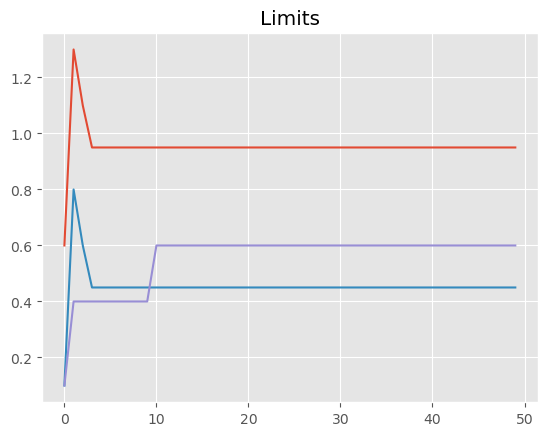

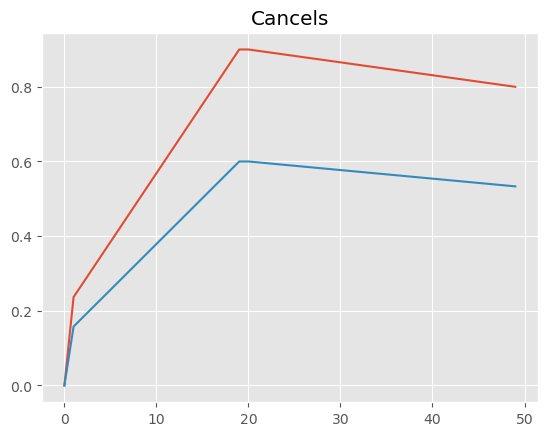

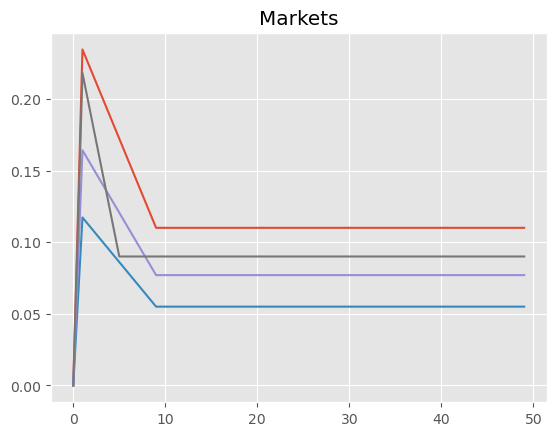

In [2208]:
###FINAL INTENSITIES

"""
LIMITS
"""
l_0 = np.array(50*[0.95])
l_0[0] = 0.6
l_0[1] = 1.3
l_0[2] = 1.1
l_1 = l_0 - 0.5
l_2 = np.append([0.4]*10,[0.6]*40)
l_2[0] = 0.1
l_3 = l_2
plt.plot(l_0)
plt.plot(l_1)
plt.plot(l_2)
plt.title("Limits")
plt.show()

"""
CANCELS
"""
c_0 = np.append(np.linspace(0.2,0.9,20),np.linspace(0.9,0.8,30))
c_0[0] = 0
c_1 = c_0
c_2 = 2/3*c_0
c_3 = c_2

plt.plot(c_0)
plt.plot(c_2)
plt.title("Cancels")
plt.show()

"""
MARKETS
"""
m_0 = np.append(np.linspace(0.25,0.11,10),[0.11]*40)
m_0[0] = 0
m_3 = np.append(np.linspace(0.25,0.09,6),[0.09]*44)
m_3[0] = 0
m_2 = 0.7*m_0
m_1 = 0.5*m_0

plt.plot(m_0)
plt.plot(m_1)
plt.plot(m_2)
plt.plot(m_3)
plt.title("Markets")
plt.show()


queue_1_0 = np.stack([m_0,c_0,l_0],axis =1)
queue_1_1 = np.stack([m_1,c_1,l_1],axis =1)
queue_1_2 = np.stack([m_2,c_2,l_2],axis =1)
queue_1_3 = np.stack([m_3,c_3,l_3],axis =1)
q_1 = np.stack([queue_1_0,queue_1_1,queue_1_2,queue_1_3])


#### Second Level Order Intensities

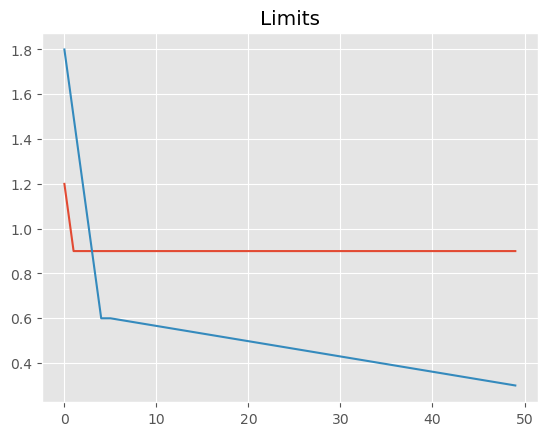

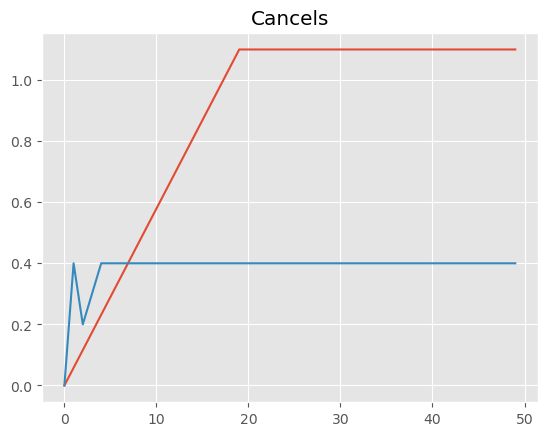

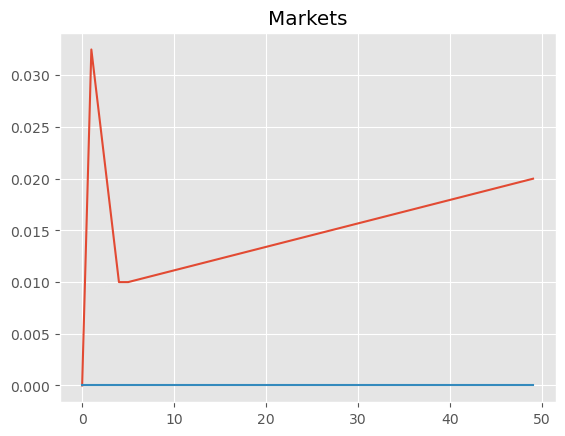

In [2211]:
"""
LIMITS
"""
second_l_0 = [0.9]*50
second_l_0[0] = 1.2
second_l_1 = np.append(np.linspace(1.8,0.6,5),np.linspace(0.6,0.3,45))

plt.plot(second_l_0)
plt.plot(second_l_1)
plt.title("Limits")
plt.show()



"""
CANCELS
"""
second_c_0 = np.append(np.linspace(0,1.1,20),[1.1]*30)
second_c_0[0] = 0
second_c_1 = 50*[0.4]
second_c_1[0] = 0
second_c_1[2] = 0.2
second_c_1[3] = 0.3

plt.plot(second_c_0)
plt.plot(second_c_1)
plt.title("Cancels")
plt.show()


"""
MARKETS
"""
second_m_0 = np.append(np.linspace(0.04, 0.01, 5),np.linspace(0.01,0.02,45))
second_m_0[0] = 0
second_m_1 = 50*[0.0]

plt.plot(second_m_0)
plt.plot(second_m_1)
plt.title("Markets")
plt.show()

queue_2_0 = np.stack([second_m_0,second_c_0,second_l_0],axis = 1)
queue_2_1 = np.stack([second_m_1,second_c_1,second_l_1],axis = 1)
q_2 = np.stack([queue_2_0,queue_2_1])

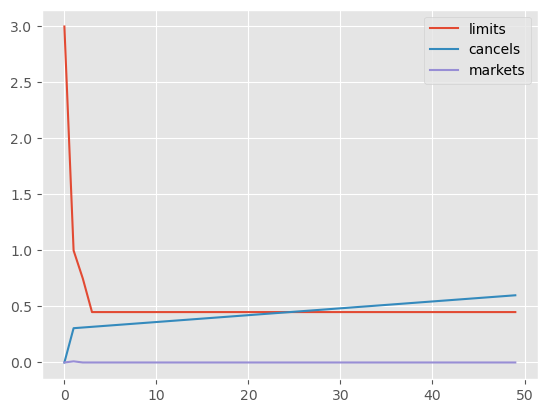

In [2212]:
"""
3rd, 4th, 5th limit intensities
"""

limit_3 = [0.45]*50
limit_3[0],limit_3[1] ,limit_3[2]= 3,1,0.75
cancel_3 = np.linspace(0.3,0.6,50)
cancel_3[0]=0
mkt_3 = [0]*50
mkt_3[1] = 0.01
q_3 = np.stack([mkt_3,cancel_3,limit_3],axis = 1)

plt.plot(limit_3)
plt.plot(cancel_3)
plt.plot(mkt_3)
plt.legend(['limits','cancels','markets'])
plt.show()

#### Hawkes Update Step Toy Model

[[0.  0.  0. ]
 [0.  0.  0.8]
 [0.  0.  0. ]
 [0.  0.  0. ]]
[[0.00000000e+00 8.00000000e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.42467496e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
[[8.00000000e-01 3.63199438e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.00879932e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
[[1.54299988e-22 7.00520861e-27 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.00000000e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


0.005390357599268374

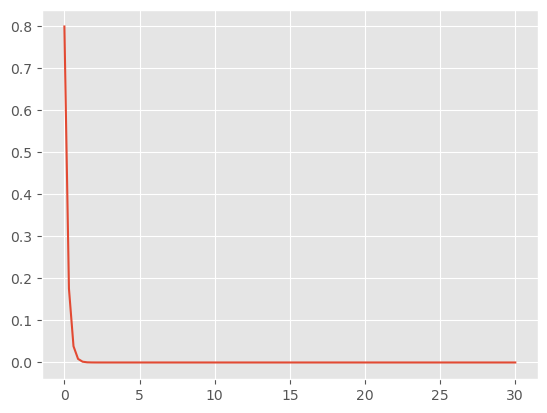

In [2216]:
alpha = 0.8
beta = 5
xs = np.linspace(0,30,100)
ys = alpha*np.exp(-beta*xs)
plt.plot(xs,ys)

events =[(1,1,2),(1.5,0,1),(2,0,0),(10,1,2)]
t0 = 0
hawkes_grid = np.array(4*[3*[0]])

for (t,queue,event) in events:
    t0 += t
    hawkes_grid = np.exp(-beta*t)*hawkes_grid
    hawkes_grid[queue,event] += alpha
    print(hawkes_grid)

np.array(4*[3*[1]])*(hawkes_grid != 0)
alpha*np.exp(-beta)

#### Time Varying Intensity Toy Model

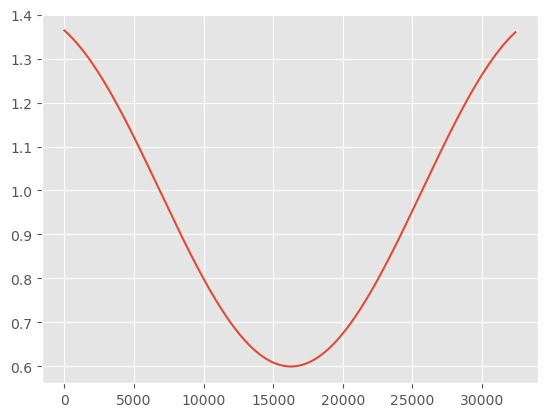

In [19]:
xs = np.linspace(0,32400,32400)
ys = 0.4*np.sin(2 + xs/6000)+1
plt.plot(ys)

## Simulation Engine

In [3624]:
"""
Trying Something New

"""

MAX_SIZE = 50
TICK = 2

class Dependent_OB():
    def __init__(self,start_state,m1,m2,m3,m4,m5,max_time):
        self.flow = []
        self.time = 0.
        self.max_time = max_time
        self.intensity1 = m1
        self.intensity2 = m2
        self.intensity3 = m3
        self.intensity4 = m4
        self.intensity5 = m5
        self.state = start_state
        self.refprice = 100
        self.prices = np.array([self.refprice + (2*level-9) for level in range(len(self.state))])
        self.spread = 1
        
        
        #ref price change probabilities
        self.theta = 0.6
        self.theta_reinit = 0.01 
        self.theta_shock = 0.0001

        #Hawkes Parameters
        self.alpha = 0.5
        self.beta = 1
        self.hawkes = np.array(10*[3*[0]])
    
    def update_mid(self):
        if self.state[4] == 0 and self.state[5] == 0:
            self.refprice = 0.5*(self.prices[3] + self.prices[6])
            self.spread = 3
        if self.state[4] == 0:
            self.refprice = 0.5*(self.prices[3] + self.prices[5])
            self.spread = 2
        if self.state[5] == 0:
            self.refprice = 0.5*(self.prices[4] + self.prices[6])
            self.spread = 2
        else:
            self.refprice = 0.5*(self.prices[4] + self.prices[5])
            self.spread = 1


    #Returns the transition matrix based on the current state of the order book
    def intensity(self):
        lookup_vals = np.minimum(np.abs(self.state),MAX_SIZE - 1)

        b_2_case = 0 if self.state[4] == 0 else 1
        a_2_case = 0 if self.state[5] == 0 else 1
        b_1_case = 0
        a_1_case = 0
        if lookup_vals[4] > 0 and lookup_vals[4] <= 4:
            a_1_case = 1
        elif lookup_vals[4] > 4 and lookup_vals[4] <= 9:
            a_1_case = 2
        elif lookup_vals[4] > 9:
            a_1_case = 3
            
        if lookup_vals[5] > 0 and lookup_vals[5] <= 4:
            b_1_case = 1
        elif lookup_vals[5] > 4 and lookup_vals[5] <= 9:
            b_1_case = 2
        elif lookup_vals[5] > 9:
            b_1_case = 3
            
        

        return np.vstack([self.intensity5[lookup_vals[0]],
                   self.intensity4[lookup_vals[1]],
                   self.intensity3[lookup_vals[2]],
                   self.intensity2[b_2_case][lookup_vals[3]],
                   self.intensity1[b_1_case][lookup_vals[4]],
                   self.intensity1[a_1_case][lookup_vals[5]],
                   self.intensity2[a_2_case][lookup_vals[6]],
                   self.intensity3[lookup_vals[7]],
                   self.intensity4[lookup_vals[8]],
                   self.intensity5[lookup_vals[9]]])


    #function that should draw from the invariant queue size distribution for a given intensity fn.
    def redraw(self,intensity):
        rho = intensity[:,2]/np.roll(np.sum(intensity[:,:2],axis = 1),-1)
        rho[-1] = rho[-2]
        pi_0 = 1/(1 + np.sum(np.cumprod(rho))) 
        pi = pi_0*np.cumprod(rho)
        pi = pi/np.sum(pi) #invariant distribution of the level of the OB
        
        rng = np.random.default_rng()
        size = rng.choice(len(pi),p = pi)

        return size
        

    #shifting the order book and redrawing the empty queue
    #used when one of the central limits goes to 0 and pref moves
    def roll_ob(self,q):

        #roll over the order book sizes, redraw the missing size
        size = self.redraw(self.intensity5)
        end_point = (-q-1)//2 
        self.state = np.roll(self.state,-q)
        self.state[end_point] = size

        #roll over the prices at each level, impute the missing endpoint. 
        if q == -1:
            self.prices = np.append([self.prices[0]-2],self.prices[:-1])
        else:
            self.prices = np.append(self.prices[1:],[self.prices[-1] + 2])

    
    #used when there is an exogenous shock causing the OB to be redrawn (ref price remains the same though)
    def full_redraw(self):
        baseline = [self.intensity5,self.intensity4,self.intensity3,self.intensity2[1],self.intensity1[1]]
        bid_sizes = []
        ask_sizes = []
        for i in range(len(baseline)):
            intensity = baseline[i]
            bid_size = self.redraw(intensity)
            ask_size = self.redraw(intensity)
            bid_sizes.append(bid_size)
            ask_sizes.append(ask_size)

        self.state = np.append(bid_sizes,list(reversed(ask_sizes)))

    def update_hawkes(self,event,queue,delta_t):
        self.hawkes = np.exp(-self.beta*delta_t)*self.hawkes
        self.hawkes[queue,event] += self.alpha

    def reset_hawkes(self):
        self.hawkes = np.array(10*[3*[0]])

    def price_shock(self):
        shift = self.refprice//75 #how much to shift... random
        rng = np.random.default_rng()
        dir = 2*rng.choice(2,p = [0.5,0.5]) - 1 #direction of the price move
        
        self.prices = self.prices + dir*shift
        self.full_redraw()
        self.update_mid()
        self.reset_hawkes()

    def time_factor(self):
        return 0.4*np.sin(2 + (self.time % 9*60*60)/6000)+1
            
    """
    Simulating the order book using Poisson processes
    """
    def simulate(self):
        levels = {0:-5,1:-4,2:-3,3:-2,4:-1,5:1,6:2,7:3,8:4,9:5}
        event_types = {0:(-1,'market'),1:(-1,'cancel'),2:(1,'limit')}
    
        while self.time < self.max_time:

            
            #get the transition matrix for central (dependent) intensities based on the current state
            transition_matrix = self.intensity()

            #add hawkes components to intensity
            #should the hawkes excitation be on (side of OB,event_type) rather (queue,event_type)? Read the literature.
            transition_matrix = (self.hawkes)*(transition_matrix != 0) + transition_matrix 

            #factor in time variation of intensities intraday
            transition_matrix = self.time_factor()*transition_matrix
    
            #total rate of all events given the current state of the order book
            total_rate = np.sum(transition_matrix)
            waiting_time = np.random.exponential(1 / total_rate)
    
            queue_level_probability = np.sum(transition_matrix,axis = 1)/total_rate
            rng = np.random.default_rng()
            
            #which queue the event will belong to
            event_queue = rng.choice(10,p = queue_level_probability)
            #which type of event is occuring within that queue
            event = rng.choice(3,p = transition_matrix[event_queue]/np.sum(transition_matrix[event_queue]))
        
    
            (change,type) = event_types[event]
          
                
            #increment time 
            self.time += waiting_time

            q = levels[event_queue]

            #append (time, queue, queue size change, type of event, current queue size) to the order flow tape
            self.flow.append((self.time,q,change,type,self.state[event_queue],self.refprice,self.spread,self.state[0],self.state[1],self.state[2],
                              self.state[3],self.state[4],self.state[5],self.state[6],self.state[7],self.state[8],self.state[9]))
            
            
            #update the relevant queue size in the OB
            self.state[event_queue] += change

            #update the hawkes grid
            self.update_hawkes(event,event_queue,waiting_time)
            
            
            #Checking for moves in the reference price
            if abs(q) == 1:
                #if liquidity in first queue was consumed or liquidity was just placed in an empty first queue
                if (self.state[event_queue] == 0 or (self.state[event_queue] == 1 and change == 1)):
                    self.reset_hawkes()
                    if (rng.choice(2,p = [1-self.theta,self.theta]) == 1):
                        self.roll_ob(q) #shift the queues over and redraw the final one. 

                        if (rng.choice(2,p = [1-self.theta_reinit,self.theta_reinit]) == 1):
                            self.full_redraw() #reinitialize all levels of the order book around the new reference price. 
                        self.update_mid()

            if rng.choice(2,p = [1-self.theta_shock,self.theta_shock]) == 1:
                self.price_shock()
    
        return pd.DataFrame(self.flow,columns = ['Time','Queue','Change','Event','Current Size','Price','Spread','bid5_size','bid4_size','bid3_size','bid2_size','bid1_size','ask1_size','ask2_size','ask3_size','ask4_size','ask5_size'])
        
        

In [3626]:
ob = Dependent_OB(10*[10],q_1,q_2,q_3,q_3,q_3,100000)

In [35]:
start = time.time()
a = ob.simulate()
end = time.time()
print(end - start)
a.to_csv('3_month_sim_v2')

/var/folders/_v/56nmhlvd1mj7w9kjvknmmy700000gn/T/ipykernel_48762/3426082802.py:88: RuntimeWarning: divide by zero encountered in divide
  rho = intensity[:,2]/np.roll(np.sum(intensity[:,:2],axis = 1),-1)


1953.6691398620605


## QR Model

Assuming independent queues, what intensities do we recover from the simulated data?

In [1688]:
qr_df['IET'] = qr_df.groupby(['Queue'])['Time'].diff()
avg_times = qr_df.groupby(['Queue','Current Size'])['IET'].mean() #average time between events indexed on queue, queue size
total_events = qr_df.groupby(['Queue','Current Size'])['IET'].count()
this_event =  qr_df.groupby(['Queue','Current Size','Event'])['IET'].count()

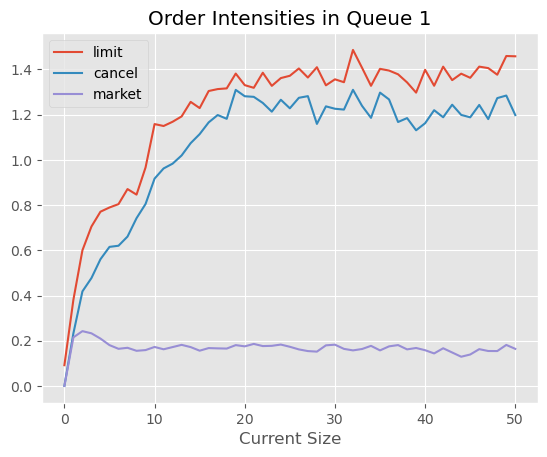

In [2156]:
q = 1 #which queue?
types = ['limit','cancel','market'] #what types of orders?

queues = [-5,-4,-3,-2,-1,1,2,3,4,5]
 
lamb = pd.DataFrame()

qr_intensities = np.array(10*[50*[np.zeros(3)]])
qr = pd.DataFrame()
for (index,queue) in enumerate(queues):
    qr = pd.DataFrame()
    for t in types:
        specific = this_event.loc[queue,::].loc[::,t]
        total = total_events.loc[queue,::]
        avg_time = avg_times.loc[queue,::]
        
        lamb = pd.DataFrame({'event_count' : specific,'overall_count' : total,'interevent_time' : avg_time})
        lamb = lamb.fillna(0)
        qr[t] = (lamb['event_count'].loc[:50]/lamb['overall_count'].loc[:50])/lamb['interevent_time'].loc[:50]

    if queue == 1:
        qr.plot()
    qr_intensities[index,:,:] = qr.values[:-1]

#plt.legend(types)
plt.title("Order Intensities in Queue "+str(q))
plt.show()
plt.close()

## QR Simulator

In [3634]:
MAX_SIZE = 50
TICK = 2

class QR_OB():
    def __init__(self,start_state,intensities,max_time):
        self.flow = []
        self.time = 0.
        self.max_time = max_time
        self.intensities = intensities
        self.state = start_state
        self.refprice = 100
        self.spread = 1
        
        
        #ref price change probabilities
        self.theta = 0.6
        self.theta_reinit = 0.01 
        self.theta_shock = 0.0001


    #Returns the transition matrix based on the current state of the order book
    def intensity(self):
        lookups = np.minimum(self.state,49).astype(int)
        return self.intensities[range(10),lookups,:]


    #function that should draw from the invariant queue size distribution for a given intensity fn.
    def redraw(self,intensity):
        rho = intensity[:,0]/np.roll(np.sum(intensity[:,1:],axis = 1),-1)
        rho[-1] = rho[-2]
        pi_0 = 1/(1 + np.sum(np.cumprod(rho))) 
        pi = pi_0*np.cumprod(rho)
        pi = pi/np.sum(pi) #invariant distribution of the level of the OB
        
        rng = np.random.default_rng()
        size = rng.choice(len(pi),p = pi)

        return size
        

    #shifting the order book and redrawing the empty queue
    #used when one of the central limits goes to 0 and pref moves
    def roll_ob(self,q):

        #roll over the order book sizes, redraw the missing size
        size = self.redraw(self.intensities[0,:,:])
        end_point = (-q-1)//2 
        self.state = np.roll(self.state,-q)
        self.state[end_point] = size

    
    #used when there is an exogenous shock causing the OB to be redrawn (ref price remains the same though)
    def full_redraw(self):
        baseline = self.intensities[:5,:,:]
        bid_sizes = []
        ask_sizes = []
        for i in range(len(baseline)):
            intensity = baseline[i]
            bid_size = self.redraw(intensity)
            ask_size = self.redraw(intensity)
            bid_sizes.append(bid_size)
            ask_sizes.append(ask_size)

        self.state = np.append(bid_sizes,list(reversed(ask_sizes)))

            
    """
    Simulating the order book using Poisson processes
    """
    def simulate(self):
        levels = {0:-5,1:-4,2:-3,3:-2,4:-1,5:1,6:2,7:3,8:4,9:5}
        event_types = {0:(1,'limit'),1:(-1,'cancel'),2:(-1,'market')}
    
        while self.time < self.max_time:

            
            #get the transition matrix for central (dependent) intensities based on the current state
            transition_matrix = self.intensity()
    
            #total rate of all events given the current state of the order book
            total_rate = np.sum(transition_matrix)
            waiting_time = np.random.exponential(1 / total_rate)
    
            queue_level_probability = np.sum(transition_matrix,axis = 1)/total_rate
            rng = np.random.default_rng()
            
            #which queue the event will belong to
            event_queue = rng.choice(10,p = queue_level_probability)
            #which type of event is occuring within that queue
            event = rng.choice(3,p = transition_matrix[event_queue]/np.sum(transition_matrix[event_queue]))
        
    
            (change,type) = event_types[event]
          
                
            #increment time 
            self.time += waiting_time

            q = levels[event_queue]

            #append (time, queue, queue size change, type of event, current queue size) to the order flow tape
            self.flow.append((self.time,q,change,type,self.state[event_queue],self.refprice,self.spread,self.state[0],self.state[1],self.state[2],
                              self.state[3],self.state[4],self.state[5],self.state[6],self.state[7],self.state[8],self.state[9]))
            
            
            #update the relevant queue size in the OB
            self.state[event_queue] += change

            
            
            #Checking for moves in the reference price
            if abs(q) == 1:
                #if liquidity in first queue was consumed or liquidity was just placed in an empty first queue
                if (self.state[event_queue] == 0 or (self.state[event_queue] == 1 and change == 1)):
                    if (rng.choice(2,p = [1-self.theta,self.theta]) == 1):
                        self.roll_ob(q) #shift the queues over and redraw the final one. 

                        if (rng.choice(2,p = [1-self.theta_reinit,self.theta_reinit]) == 1):
                            self.full_redraw() #reinitialize all levels of the order book around the new reference price.

            if (rng.choice(2,p = [1-self.theta_shock,self.theta_shock]) == 1):
                            self.full_redraw() #reinitialize all levels of the order book around the new reference price. 
    
    
        return pd.DataFrame(self.flow,columns = ['Time','Queue','Change','Event','Current Size','Price','Spread','bid5_size','bid4_size','bid3_size','bid2_size','bid1_size','ask1_size','ask2_size','ask3_size','ask4_size','ask5_size'])
        
        

In [3636]:
qr_ob = QR_OB((15*np.ones(10)).astype(int),qr_intensities,100000)

In [3638]:
qr_df = qr_ob.simulate()

/var/folders/_v/56nmhlvd1mj7w9kjvknmmy700000gn/T/ipykernel_55480/1195853411.py:29: RuntimeWarning: divide by zero encountered in divide
  rho = intensity[:,0]/np.roll(np.sum(intensity[:,1:],axis = 1),-1)


## Deep Queue Reactive Model

In [ ]:
bb = pd.read_csv('3_day_sim')

#### Generic Preprocessing

In [1364]:
# Function to return a descriptive stats table at the top of pg 6
def get_descriptive_stats(df):

    # Add in columns for level and order size
    stats_df = df.copy()
    stats_df['Level'] = stats_df['Queue'].abs()
    stats_df['Order_Size'] = stats_df['Change'].abs()

    event_types = ['limit', 'cancel', 'market']

    # Group by level
    grouped = stats_df.groupby('Level')

    results = []

    for level, level_df in grouped:
        row = {'Level': level}

        for event in event_types:
            row[f'N_{event}'] = (level_df['Event'] == event).sum()

        # Compute AES
        row['AES'] = level_df['Order_Size'].mean()

        # Compute AIT
        level_df['Inter_Arrival_Time'] = level_df['Time'].diff()
        row['AIT'] = level_df['Inter_Arrival_Time'].mean()

        results.append(row)

    summary_df = pd.DataFrame(results)

    return summary_df

In [1366]:
# Function to normalise queue sizes by average event size (preprocessing step on pg 6)
def normalise_queues(df):
    normalised_df = df.copy()
    normalised_df['Order_Size'] = normalised_df['Change'].abs()

    # Calculate average event size by queue
    aes_per_queue = normalised_df.groupby('Queue')['Order_Size'].mean()

    # Normalise
    normalised_df['Normalised_Current_Size'] = np.ceil(normalised_df['Current Size']/normalised_df['Queue'].map(aes_per_queue))

    return normalised_df

In [1368]:
# Function to partition the data into segments of constant reference price (preprocessing step on pg 6)

def reset_inter_event_times(df):
    reset_inter_times_df = df.copy().reset_index().drop(columns = ['index'])
    reset_inter_times_df['Pref_Change'] = (reset_inter_times_df['Price']!=reset_inter_times_df['Price'].shift(1)).astype(int)
    reset_inter_times_df.loc[0,'Pref_Change'] = 0
    
    reset_inter_times_df['Delta_t'] = reset_inter_times_df['Time'].diff()
    
    reset_inter_times_df = reset_inter_times_df.dropna()
    return reset_inter_times_df[reset_inter_times_df['Pref_Change'] == 0.0]

In [1370]:
from sklearn.preprocessing import MinMaxScaler

#function to get the features for excitation deep learning
def excitation_get_features(df):
    processed_df = df.copy()

    # Convert event type to categorical format
    event_mapping = {'limit': 0, 'cancel': 1, 'market': 2}
    processed_df['Event_Type'] = processed_df['Event'].map(event_mapping)

    # Get column for previous event
    processed_df['Prev_Event_Type'] = processed_df['Event_Type'].shift(1).fillna(0).astype(int)
    features = processed_df[['Time','Normalised_Current_Size', 'Delta_t', 'Event_Type', 'Prev_Event_Type']]

    return features.fillna(0)

In [52]:
b = b[b.Queue == 1]
df = normalise_queues(b)
df = reset_inter_event_times(df)
df = excitation_get_features(df)
get_descriptive_stats(b)

,Level,N_limit,N_cancel,N_market,AES,AIT
0,1,95911,80622,14210,1.0,0.524264


#### Queue Size DQR

In [33]:
def dqr_loss(y_true, y_pred):
    """
    Custom loss function based on log-likelihood for event intensities.

    Args:
        y_true: Tensor (batch_size, 2) → (event_type, delta_t)
        y_pred: Tensor (batch_size, 3) → (λ_L, λ_C, λ_M)

    Returns:
        Scalar loss value.
    """
    event_type = tf.cast(y_true[:, 0], tf.int32)  # Convert event type to integer
    delta_t = y_true[:, 1]  # Inter-event time

    lambda_total = tf.reduce_sum(y_pred, axis=1)  # Sum of all intensities
    lambda_eta = tf.gather(y_pred, event_type, axis=1, batch_dims=1)  # Pick correct event intensity

    log_likelihood = tf.math.log(lambda_eta + 1e-6) - lambda_total * delta_t  # Small epsilon to avoid log(0)

    return -tf.reduce_mean(log_likelihood)  # Take mean loss over batch

In [4]:
def cyclic_lr(epoch, max_epochs=50, min_lr=1e-5, max_lr=1e-3):
    """
    Cyclical learning rate function
    Arguments:
    epoch -- Current epoch number
    max_epochs -- Total number of epochs in the cycle
    min_lr -- Minimum learning rate
    max_lr -- Maximum learning rate
    
    Returns:
    A learning rate value based on the current epoch
    """
    cycle = np.floor(1 + epoch / (2 * max_epochs))
    x = np.abs(epoch / max_epochs - 2 * cycle + 1)
    lr = min_lr + (max_lr - min_lr) * np.maximum(0, (1 - x))
    return lr


In [37]:
def my_build_simple_dqr_model():
    """
    Defines a simple DQR model using Sequential API.

    Returns:
        Compiled Keras model.
    """
    model = Sequential([
        Input(shape=(1,)),  # 1 feature: Queue Size
        Dense(128),# First hidden layer
        Activation('tanh'),
        #BatchNormalization(momentum = 0.001,center = False,scale = False),
        Dense(32),   # Second hidden layer    # Batch Normalization layer after the second Dense layer
        Activation('tanh'),
        #BatchNormalization(momentum = 0.001,center = False,scale = False),
        Dense(3, activation="relu", name="Intensity_Output")  # Output: (λ_L, λ_C, λ_M)
    ])

    # Compile model
    model.compile(optimizer=Adam(), loss=dqr_loss)

    return model


In [39]:
def my_train_simple_dqr_model(df, batch_size=32, epochs=100):
    """
    Trains the simplified DQR model.

    Args:
        df (pd.DataFrame): Preprocessed dataset.
        batch_size (int): Batch size.
        epochs (int): Number of epochs.

    Returns:
        model (tf.keras.Model): Trained model.
        history (tf.keras.callbacks.History): Training history.
    """

    # Train-validation split (80:20)
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

    # Prepare inputs for Keras model
    X_train = train_df[["Normalised_Current_Size"]].values
    X_val = val_df[["Normalised_Current_Size"]].values

    # Labels (ensure correct shape)
    y_train = np.stack([train_df["Event_Type"], train_df["Delta_t"]], axis=1)
    y_val = np.stack([val_df["Event_Type"], val_df["Delta_t"]], axis=1)

    early_stopping = EarlyStopping(
    monitor='val_loss',        # You can monitor validation loss or accuracy
    patience=20,               # Stop after 10 epochs without improvement
    restore_best_weights=False  # Restore the model weights from the best epoch
    )

    lr_scheduler = LearningRateScheduler(cyclic_lr, verbose=1)

    # Build the model
    model = my_build_simple_dqr_model()

    # Debugging: Print input shapes before training
    print("Shapes of Inputs:")
    print("X_train:", X_train.shape)
    print("y_train:", y_train.shape)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                        batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[lr_scheduler,early_stopping])

    return model, history


In [88]:
model = my_train_simple_dqr_model(df)[0]

Shapes of Inputs:
X_train: (149384, 1)
y_train: (149384, 2)

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 3s 473us/step - loss: 3.5336 - val_loss: 1.0345 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.2500950416433626e-05.
Epoch 2/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 2s 459us/step - loss: 1.0252 - val_loss: 1.0144 - learning_rate: 1.2501e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.00016883054563804762.
Epoch 3/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 2s 477us/step - loss: 1.0173 - val_loss: 1.0161 - learning_rate: 1.6883e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007069780313601951.
Epoch 4/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 2s 459us/step - loss: 1.2408 - val_loss: 1.0556 - learning_rate: 7.0698e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00012436499066713623.
Epoch 5/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 2s 462us/step - loss: 1.0375 - val

In [96]:
model.save('DQR_baseline_Q1_v2.keras')

In [ ]:
model = tf.keras.models.load_model('DQR_baseline_Q1.keras',compile = False)

In [90]:
y_pred = model.predict(np.array([x for x in range(50)]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [92]:
limit = y_pred[:,0]
cancel = y_pred[:,1]
market = y_pred[:,2]

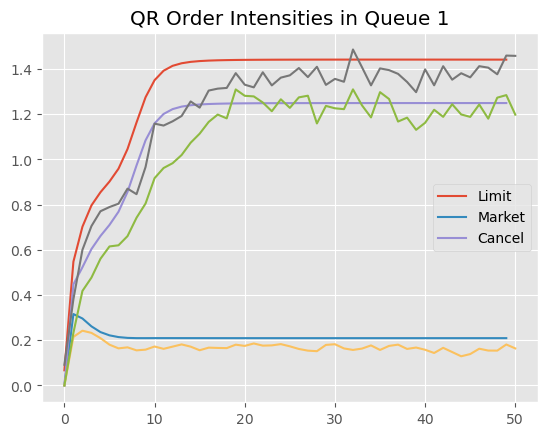

In [98]:
plt.plot(limit)
plt.plot(market)
plt.plot(cancel)

q = 1 #which queue?
leg = ['Deep limit','Deep market','Deep cancel','QR limit',' QR cancel','QR market'] 
types = ['limit','market','cancel'] #what types of orders?
 
lamb = pd.DataFrame()


for type in types:
    specific = this_event.loc[q,::].loc[::,type]
    total = total_events.loc[q,::]
    avg_time = avg_times.loc[q,::]
    
    lamb = pd.DataFrame({'event_count' : specific,'overall_count' : total,'interevent_time' : avg_time})
    lamb = lamb.fillna(0)
    plt.plot((lamb['event_count'].loc[:50]/lamb['overall_count'].loc[:50])/lamb['interevent_time'].loc[:50])



plt.legend(['Limit','Market','Cancel'])

plt.title("QR Order Intensities in Queue "+str(q))

plt.show()
plt.close()

#### Queue Size + Excitation

In [41]:
#function to build the model
#uses embeddings for previous event feature

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam

def my_build_simple_excitation_dqr_model():
    """
    Defines a simple DQR model that uses Queue_Size and an embedded Prev_Event_Type.

    Returns:
        model (tf.keras.Model): Compiled Keras model.
    """

    # Input for the continuous feature: Queue_Size.
    queue_input = Input(shape=(1,), name="Queue_Size")

    # Input for the categorical feature: Prev_Event_Type.
    # This should be integer-encoded (e.g., 0, 1, 2 for Limit, Cancel, Market).
    prev_event_input = Input(shape=(1,), name="Prev_Event_Type")

    # Embed the previous event type.
    # Assuming there are 3 event types (0, 1, 2), so input_dim=3.
    # We'll use an embedding dimension of 2.
    prev_event_embedding = Embedding(input_dim=3, output_dim=2, name="Prev_Event_Embedding")(prev_event_input)
    prev_event_embedding = Flatten()(prev_event_embedding)

    # Concatenate the continuous queue size and the embedded previous event feature.
    merged = Concatenate()([queue_input, prev_event_embedding])

    # Two hidden layers with tanh activation.
    hidden = Dense(128, activation="tanh")(merged)
    batch_norm = BatchNormalization()(hidden)
    hidden = Dense(32, activation="tanh")(batch_norm)
    batch_norm = BatchNormalization()(hidden)

    # Output layer: 3 neurons for the intensity functions.
    # Use softplus activation to ensure positivity.
    output = Dense(3, activation="relu", name="Intensity_Output")(batch_norm)

    # Define the model.
    model = Model(inputs=[queue_input, prev_event_input], outputs=output)

    # Compile the model using Adam with a learning rate of 1e-5 and our custom loss.
    model.compile(optimizer=Adam(learning_rate=1e-5), loss=dqr_loss)

    return model



In [43]:
#function to train excitation DQR model
#includes prev event queue in the feature space

def my_train_simple_excitation_dqr_model(df, batch_size=32, epochs=100):
    """
    Trains the simplified DQR model.

    Args:
        df (pd.DataFrame): Preprocessed dataset.
        batch_size (int): Batch size.
        epochs (int): Number of epochs.

    Returns:
        model (tf.keras.Model): Trained model.
        history (tf.keras.callbacks.History): Training history.
    """

    # Train-validation split (80:20)
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=1)

    # Prepare inputs for Keras model
    X_train = [
        train_df["Normalised_Current_Size"].values.reshape(-1, 1),
        train_df["Prev_Event_Type"].astype(int).values.reshape(-1, 1)
    ]
    X_val = [
        val_df["Normalised_Current_Size"].values.reshape(-1, 1),
        val_df["Prev_Event_Type"].astype(int).values.reshape(-1, 1)
    ]

    # Labels (ensure correct shape)
    y_train = np.stack([train_df["Event_Type"], train_df["Delta_t"]], axis=1)
    y_val = np.stack([val_df["Event_Type"], val_df["Delta_t"]], axis=1)

    early_stopping = EarlyStopping(
    monitor='val_loss',        # You can monitor validation loss or accuracy
    patience=20,               # Stop after 10 epochs without improvement
    restore_best_weights=False  # Restore the model weights from the best epoch
    )

    lr_scheduler = LearningRateScheduler(cyclic_lr, verbose=1)

    # Build the model
    model = my_build_simple_excitation_dqr_model()

    # Debugging: Print input shapes before training
    #print("Shapes of Inputs:")
    #print("X_train:", X_train.shape)
    #print("y_train:", y_train.shape)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        batch_size=batch_size, epochs=epochs, verbose=1,callbacks=[lr_scheduler,early_stopping])

    return model, history


In [ ]:
trained_my_excitation_model, my_training_history = my_train_simple_excitation_dqr_model(df)

In [ ]:
trained_my_excitation_model.save('DQR_excitation_Q1_v2.keras')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Queue_Size', 'Prev_Event_Type']. Received: the structure of inputs=('*', '*')
  warnings.warn(


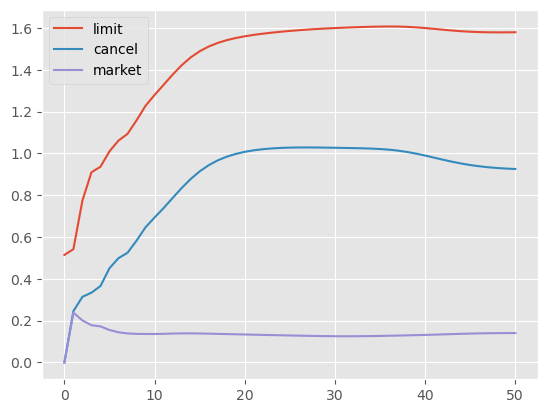

In [316]:
#get predictions when previous event is a limit order

prev_event_type = 0
q = np.array([[queue, prev_event_type] for queue in range(51)])
X_test = [q[:, 0].reshape(-1, 1), q[:, 1].reshape(-1, 1)]
y_pred0 = trained_my_excitation_model.predict(X_test)
limit0 = y_pred0[:,0]
cancel0 = y_pred0[:,1]
market0 = y_pred0[:,2]

plt.plot(limit0)
plt.plot(cancel0)
plt.plot(market0)
plt.legend(['limit','cancel','market'])
plt.show()
plt.close()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


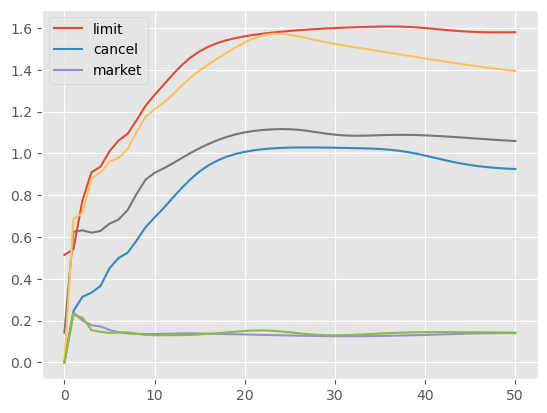

In [318]:
#get predictions when previous event is a cancel

prev_event_type = 1
q = np.array([[queue, prev_event_type] for queue in range(51)])
X_test = [q[:, 0].reshape(-1, 1), q[:, 1].reshape(-1, 1)]
y_pred1 = trained_my_excitation_model.predict(X_test)
limit1 = y_pred1[:,0]
cancel1 = y_pred1[:,1]
market1 = y_pred1[:,2]

plt.plot(limit0)
plt.plot(cancel0)
plt.plot(market0)
plt.plot(limit1)
plt.plot(cancel1)
plt.plot(market1)
plt.legend(['limit','cancel','market'])
plt.show()
plt.close()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


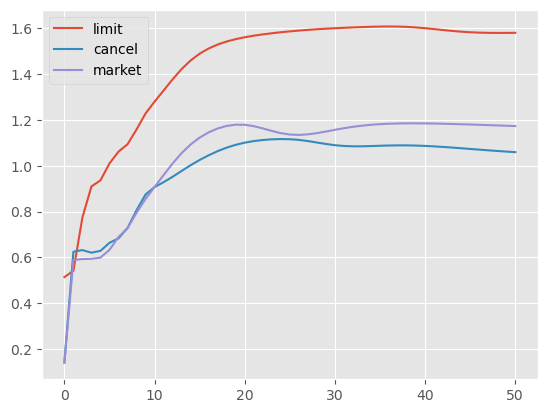

In [320]:
#get predictions when previous event is a market order

prev_event_type = 2
q = np.array([[queue, prev_event_type] for queue in range(51)])
X_test = [q[:, 0].reshape(-1, 1), q[:, 1].reshape(-1, 1)]
y_pred2 = trained_my_excitation_model.predict(X_test)
limit2 = y_pred2[:,0]
cancel2 = y_pred2[:,1]
market2 = y_pred2[:,2]

plt.plot(limit0)
plt.plot(limit1)
plt.plot(limit2)
plt.legend(['limit','cancel','market'])
plt.show()
plt.close()

In [1360]:
#function to calculate probability transition matrix from
def get_empirical_transition_matrix(df):
    length = len(df)
    c_00 = len(df[(df['Event_Type']==0) & (df['Prev_Event_Type']==0)])
    c_10 = len(df[(df['Event_Type']==1) & (df['Prev_Event_Type']==0)])
    c_20 = len(df[(df['Event_Type']==2) & (df['Prev_Event_Type']==0)])
    c_01 = len(df[(df['Event_Type']==0) & (df['Prev_Event_Type']==1)])
    c_11 = len(df[(df['Event_Type']==1) & (df['Prev_Event_Type']==1)])
    c_21 = len(df[(df['Event_Type']==2) & (df['Prev_Event_Type']==1)])
    c_02 = len(df[(df['Event_Type']==0) & (df['Prev_Event_Type']==2)])
    c_12 = len(df[(df['Event_Type']==1) & (df['Prev_Event_Type']==2)])
    c_22 = len(df[(df['Event_Type']==2) & (df['Prev_Event_Type']==2)])
    p_00 = c_00/(c_00+c_10+c_20)
    p_10 = c_10/(c_00+c_10+c_20)
    p_20 = c_20/(c_00+c_10+c_20)
    p_01 = c_01/(c_01+c_11+c_21)
    p_11 = c_11/(c_01+c_11+c_21)
    p_21 = c_21/(c_01+c_11+c_21)
    p_02 = c_02/(c_02+c_12+c_22)
    p_12 = c_12/(c_02+c_12+c_22)
    p_22 = c_22/(c_02+c_12+c_22)
    row0 = np.array([p_00,p_10,p_20])
    row1 = np.array([p_01,p_11,p_21])
    row2 = np.array([p_02,p_12,p_22])
    emp_transition_matrix = np.vstack((row0,row1,row2))
    return emp_transition_matrix


In [47]:
def calc_DQR_transition_matrix(y_pred0,y_pred1,y_pred2):
    total0 = np.sum(y_pred0,axis = 1)
    n=len(total0)
    p_00,p_10,p_20 = np.mean(y_pred0[1:,:]/total0[1:].reshape(n-1,1),axis = 0)
    probs0 = p_00,p_10,p_20

    total1 = np.sum(y_pred1,axis = 1)
    p_01,p_11,p_21 = np.mean(y_pred1/total1.reshape(n,1),axis = 0)
    probs1 = p_01,p_11,p_21

    total2 = np.sum(y_pred2,axis = 1)
    p_02,p_12,p_22 = np.mean(y_pred2/total2.reshape(n,1),axis = 0)
    probs2 = p_02,p_12,p_22

    DQR_transition_matrix = np.vstack((probs0,probs1,probs2))
    return DQR_transition_matrix

In [474]:
dqr_transition = calc_DQR_transition_matrix(y_pred0,y_pred1,y_pred2)

In [476]:
empirical_transition = get_empirical_transition_matrix(df)

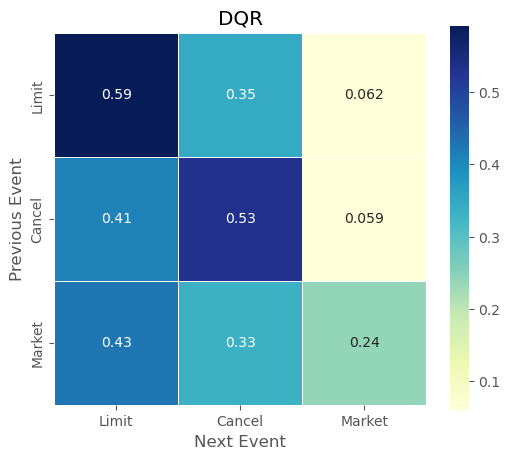

In [480]:
plt.figure(figsize=(6, 5))
labels = ['Limit','Cancel','Market']

sns.heatmap(dqr_transition, cmap = 'YlGnBu',annot=True, cbar=True, square=True, linewidths=0.5,xticklabels = labels,yticklabels = labels)
plt.title("DQR")
plt.xlabel("Next Event")
plt.xticks()
plt.ylabel("Previous Event")
plt.show()

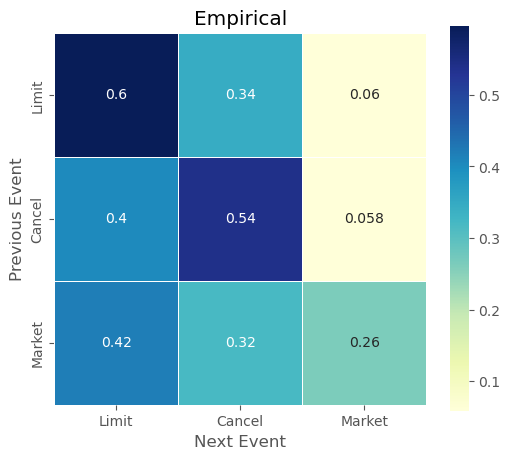

In [482]:
plt.figure(figsize=(6, 5))
labels = ['Limit','Cancel','Market']

sns.heatmap(empirical_transition, cmap = 'YlGnBu',annot=True, cbar=True, square=True, linewidths=0.5,xticklabels = labels,yticklabels = labels)
plt.title("Empirical")
plt.xlabel("Next Event")
plt.xticks()
plt.ylabel("Previous Event")
plt.show()

In [508]:
QR_transition = calc_DQR_transition_matrix(qr.values,qr.values,qr.values)

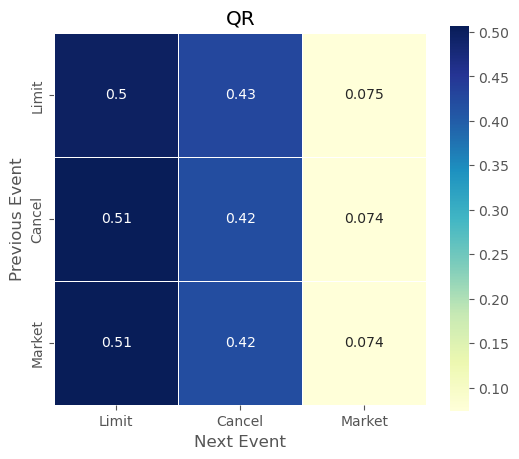

In [512]:
plt.figure(figsize=(6, 5))
labels = ['Limit','Cancel','Market']

sns.heatmap(QR_transition, cmap = 'YlGnBu',annot=True, cbar=True, square=True, linewidths=0.5,xticklabels = labels,yticklabels = labels)
plt.title("QR")
plt.xlabel("Next Event")
plt.xticks()
plt.ylabel("Previous Event")
plt.show()

#### Queue Size + Hour

In [47]:
# function to calculate what hour of the day it is for each event
# input is the queue df (the datafram with all the queue 1 events for example)

hours_per_day = 9

def calc_hour_of_event(df):
    df['Hour'] = ((df['Time'] % 9*60*60)//3600 ).astype(int)
    df['Diff'] = df['Time'].diff().fillna(1)
    return df

In [51]:
#function to display average intensity for each hour throughout the days of simulation
#groups by hour for data within a specific queue
#function to display average intensity for each hour throughout the days of simulation
#interprets intensity as inverse of average inter event time
#input queue_df
#probs a better way to go about plotting this as our intensity functions vary dependent on queue size (could also group by queue size to account for this)

def visualise_intraday_intensities(df):
    plot_df = df.copy()
    grouped_df = plot_df.groupby('Hour')['Delta_t'].mean()
    grouped_df = 1/grouped_df
    grouped_df.plot()
    return print(grouped_df)

Hour
0    3.230097
1    3.051678
2    2.536726
3    1.894154
4    1.486870
5    1.344606
6    1.474408
7    1.869483
8    2.575385
Name: Delta_t, dtype: float64


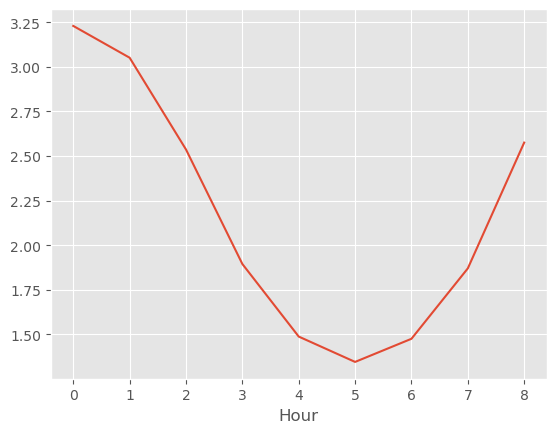

In [112]:
df = calc_hour_of_event(df)
visualise_intraday_intensities(df)

In [ ]:
visualise_intraday_intensities(df[df['Normalised_Current_Size']==15])

In [ ]:
# build function for intraday
#same loss function as per usual

def my_build_simple_intraday_dqr_model():
    """

    Returns:
        model (tf.keras.Model): Compiled Keras model.
    """

    # Input for the continuous feature: Queue_Size.
    queue_input = Input(shape=(1,), name="Queue_Size")


    hour_input = Input(shape=(1,), name="Hour")


    hour_embedding = Embedding(input_dim=hours_per_day, output_dim=2, name="Hour_Embedding")(hour_input)
    hour_embedding = Flatten()(hour_embedding)

    merged = Concatenate()([queue_input, hour_embedding])

    
    # Two hidden layers with tanh activation, with batch normalization after each dense layer
    hidden = Dense(128)(merged)
    activation = Activation('tanh')(hidden)
    #batch_norm = BatchNormalization()(activation)
    hidden = Dense(32)(activation)
    activation = Activation('tanh')(hidden)
    #batch_norm = BatchNormalization()(activation)

    # Output layer: 3 neurons for the intensity functions.
    # Use softplus activation to ensure positivity.
    output = Dense(3, activation="relu", name="Intensity_Output")(activation)

    model = Model(inputs=[queue_input, hour_input], outputs=output)
    

    

    # Compile the model using Adam with a learning rate of 1e-5 and our custom loss.
    model.compile(optimizer=Adam(learning_rate=1e-5), loss=dqr_loss)



    

    return model



In [ ]:
#function to train intraday model
def my_train_simple_intraday_dqr_model(df, batch_size=32, epochs=100):
    """
    Trains the simplified DQR model.

    Args:
        df (pd.DataFrame): Preprocessed dataset.
        batch_size (int): Batch size.
        epochs (int): Number of epochs.

    Returns:
        model (tf.keras.Model): Trained model.
        history (tf.keras.callbacks.History): Training history.
    """

    # Train-validation split (80:20)
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=1)

    # Prepare inputs for Keras model
    X_train = [
        train_df["Normalised_Current_Size"].values.reshape(-1, 1),
        train_df["Hour"].values.reshape(-1, 1)
    ]
    X_val = [
        val_df["Normalised_Current_Size"].values.reshape(-1, 1),
        val_df["Hour"].values.reshape(-1, 1)
    ]

    # Labels (ensure correct shape)
    y_train = np.stack([train_df["Event_Type"], train_df["Delta_t"]], axis=1)
    y_val = np.stack([val_df["Event_Type"], val_df["Delta_t"]], axis=1)

    early_stopping = EarlyStopping(
    monitor='val_loss',        # You can monitor validation loss or accuracy
    patience=20,               # Stop after 10 epochs without improvement
    restore_best_weights=False  # Restore the model weights from the best epoch
    )

    lr_scheduler = LearningRateScheduler(cyclic_lr, verbose=1)

    # Build the model
    model = my_build_simple_intraday_dqr_model()

    # Debugging: Print input shapes before training
    #print("Shapes of Inputs:")
    #print("X_train:", X_train.shape)
    #print("y_train:", y_train.shape)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        batch_size=batch_size, epochs=epochs, verbose=1,callbacks = [lr_scheduler,early_stopping])

    return model, history


In [ ]:
trained_my_intraday_model, my_training_history = my_train_simple_intraday_dqr_model(df,batch_size = 32, epochs = 100)

In [ ]:
trained_my_intraday_model.save('DQR_intraday_Q1_v2.keras')

In [ ]:
"""
queue_size = np.array([x for x in range(50)])
time = np.ones(50)*0
X_test = [queue_size.reshape(-1,1),time.reshape(-1,1)]
y_pred = trained_my_intraday_model.predict(X_test)
y_pred
"""

In [ ]:
#plots of predictions for each hour

hour_intensity = []
for hour in range(9):
    queue_size = np.array([x for x in range(50)])
    time = np.ones(50)*hour
    X_test = [queue_size.reshape(-1,1),time.reshape(-1,1)]
    y_pred = trained_my_intraday_model.predict(X_test)
    hour_intensity.append(y_pred.sum()/50)
    limit = y_pred[:,0]
    cancel = y_pred[:,1]
    market = y_pred[:,2]
    if hour in [0,5,8]:
        plt.plot(limit)
        plt.plot(market)
        plt.plot(cancel)
        plt.title("Hour "+str(hour)+" Intensities")
        plt.show()
        plt.close()

    
plt.plot(hour_intensity)
    #plt.plot(cancel)
    #plt.plot(market)
plt.show()

#### Queue Size + Hour + Last Event

In [145]:
# build function for intraday
#same loss function as per usual

def my_build_combined_event_intraday_dqr_model():
    """

    Returns:
        model (tf.keras.Model): Compiled Keras model.
    """

    # Input for the continuous feature: Queue_Size.
    queue_input = Input(shape=(1,), name="Queue_Size")


    hour_input = Input(shape=(1,), name="Hour")

    last_event_input = Input(shape=(1,),name = "Prev_Event")


    hour_embedding = Embedding(input_dim=hours_per_day, output_dim=2, name="Hour_Embedding")(hour_input)
    hour_embedding = Flatten()(hour_embedding)

    last_event_embedding = Embedding(input_dim=3, output_dim=2, name="Prev_Event_Embedding")(last_event_input)
    last_event_embedding = Flatten()(last_event_embedding)

    merged = Concatenate()([queue_input, hour_embedding,last_event_embedding])

    
    # Two hidden layers with tanh activation, with batch normalization after each dense layer
    hidden = Dense(128)(merged)
    activation = Activation('tanh')(hidden)
    #batch_norm = BatchNormalization()(activation)
    hidden = Dense(32)(activation)
    activation = Activation('tanh')(hidden)
    #batch_norm = BatchNormalization()(activation)

    # Output layer: 3 neurons for the intensity functions.
    # Use softplus activation to ensure positivity.
    output = Dense(3, activation="relu", name="Intensity_Output")(activation)

    model = Model(inputs=[queue_input, hour_input,last_event_input], outputs=output)

    # Compile the model using Adam with a learning rate of 1e-5 and our custom loss.
    model.compile(optimizer=Adam(learning_rate=1e-5), loss=dqr_loss)
    
    return model



In [151]:
#function to train intraday model
def my_train_combined_intraday_dqr_model(df, batch_size=32, epochs=100):
    """
    Trains the simplified DQR model.

    Args:
        df (pd.DataFrame): Preprocessed dataset.
        batch_size (int): Batch size.
        epochs (int): Number of epochs.

    Returns:
        model (tf.keras.Model): Trained model.
        history (tf.keras.callbacks.History): Training history.
    """

    # Train-validation split (80:20)
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=1)

    # Prepare inputs for Keras model
    X_train = [
        train_df["Normalised_Current_Size"].values.reshape(-1, 1),
        train_df["Hour"].values.reshape(-1, 1),
        train_df["Prev_Event_Type"].values.reshape(-1,1)
    ]
    X_val = [
        val_df["Normalised_Current_Size"].values.reshape(-1, 1),
        val_df["Hour"].values.reshape(-1, 1),
        val_df["Prev_Event_Type"].values.reshape(-1,1)
    ]

    # Labels (ensure correct shape)
    y_train = np.stack([train_df["Event_Type"], train_df["Delta_t"]], axis=1)
    y_val = np.stack([val_df["Event_Type"], val_df["Delta_t"]], axis=1)

    # Build the model
    model = my_build_combined_event_intraday_dqr_model()

    early_stopping = EarlyStopping(
    monitor='val_loss',        # You can monitor validation loss or accuracy
    patience=20,               # Stop after 10 epochs without improvement
    restore_best_weights=False  # Restore the model weights from the best epoch
    )

    lr_scheduler = LearningRateScheduler(cyclic_lr, verbose=1)

    # Debugging: Print input shapes before training
    #print("Shapes of Inputs:")
    #print("X_train:", X_train.shape)
    #print("y_train:", y_train.shape)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        batch_size=batch_size, epochs=epochs, verbose=1,callbacks = [lr_scheduler,early_stopping])

    return model, history


In [248]:
combined_model = my_train_combined_intraday_dqr_model(df,32,100)[0]


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 3s 587us/step - loss: 7.0435 - val_loss: 6.5579 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.2500950416433626e-05.
Epoch 2/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 3s 550us/step - loss: 6.5058 - val_loss: 6.5515 - learning_rate: 1.2501e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.00016883054563804762.
Epoch 3/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 3s 547us/step - loss: 6.4413 - val_loss: 6.5205 - learning_rate: 1.6883e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007069780313601951.
Epoch 4/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 3s 556us/step - loss: 6.4565 - val_loss: 1.0901 - learning_rate: 7.0698e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00012436499066713623.
Epoch 5/100
4669/4669 ━━━━━━━━━━━━━━━━━━━━ 3s 550us/step - loss: 1.0056 - val_loss: 0.9495 - learning_rate: 1.2436e-04

Epoch 6: Learning

In [258]:
combined_model.save('DQR_combined_Q1_v2.keras')

In [254]:
queue_size = np.array([x for x in range(50)])
hour = np.ones(50)*8
last_event = np.ones(50)*2
y_comb = combined_model.predict([queue_size,hour,last_event])

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/stepWARNING:tensorflow:5 out of the last 5766 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x379038540> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
y_comb

In [250]:
hour = np.array(list(range(9)))
last_event = np.ones(9)*0
queue_size = np.ones(9)*0
y_comb = combined_model.predict([queue_size,hour,last_event])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


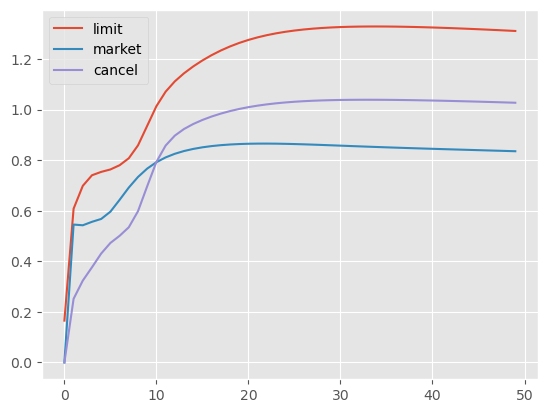

In [256]:
limit = y_comb[:,0]
cancel = y_comb[:,1]
market = y_comb[:,2]

plt.plot(limit)
plt.plot(market)
plt.plot(cancel)
plt.legend(['limit','market','cancel'])

## DQR Analysis and Validation Tests

In [23]:
#get new sim for testing the Models
test_ob = Dependent_OB(10*[10],q_1,q_2,q_3,q_3,q_3,100000)
test_df = test_ob.simulate()

/var/folders/_v/56nmhlvd1mj7w9kjvknmmy700000gn/T/ipykernel_47485/3426082802.py:88: RuntimeWarning: divide by zero encountered in divide
  rho = intensity[:,2]/np.roll(np.sum(intensity[:,:2],axis = 1),-1)


In [53]:
test_df = test_df[test_df.Queue == 1]
get_descriptive_stats(test_df)
test_df = normalise_queues(test_df)
test_df = reset_inter_event_times(test_df)
test_df = excitation_get_features(test_df)
test_df = calc_hour_of_event(test_df)

In [55]:
test_df

,Time,Normalised_Current_Size,Delta_t,Event_Type,Prev_Event_Type,Hour,Diff
1,4.367926,11.0,2.940687,2,0,4,1.000000
2,4.580222,10.0,0.212297,2,2,4,0.212297
3,4.859335,9.0,0.279113,2,2,4,0.279113
4,5.414883,8.0,0.555548,2,2,5,0.555548
5,7.521250,7.0,2.106367,0,2,7,2.106367
...,...,...,...,...,...,...,...
186851,99997.060478,51.0,0.148711,0,0,7,0.148711
186852,99997.461667,52.0,0.401189,0,0,7,0.401189
186853,99997.847720,53.0,0.386053,1,0,7,0.386053
186854,99998.441778,52.0,0.594058,1,1,8,0.594058


#### Next Event Prediction

In [57]:
model = tf.keras.models.load_model('DQR_baseline_Q1_v2.keras',compile = False)
trained_my_intraday_model = tf.keras.models.load_model('DQR_intraday_Q1_v2.keras',compile = False)
trained_my_excitation_model = tf.keras.models.load_model('DQR_excitation_Q1_v2.keras',compile = False)
combined_model = tf.keras.models.load_model('DQR_combined_Q1_v2.keras',compile = False)

In [133]:
#calc accuracy of baseline model in predicting next event
vanilla_X_test = np.array([
    test_df["Normalised_Current_Size"]
])
vanilla_y_pred = model.predict(vanilla_X_test)
probs = vanilla_y_pred/np.vstack([np.sum(vanilla_y_pred,axis=1),np.sum(vanilla_y_pred,axis=1),np.sum(vanilla_y_pred,axis=1)]).T
vanilla_predicted_events = np.array([np.random.choice(3,p=prob) for prob in probs])
vanilla_true_events = test_df["Event_Type"].astype(int).values


prediction_matrix = np.array(3*[np.zeros(3)])
for (predicted,true) in zip(vanilla_predicted_events,vanilla_true_events):
    prediction_matrix[true,predicted] += 1
    
vanilla_balanced_accuracy = (prediction_matrix.diagonal()/prediction_matrix.sum(axis=1)).sum()/3
print(vanilla_balanced_accuracy)

vanilla_accuracy = np.mean(vanilla_predicted_events == vanilla_true_events)
vanilla_accuracy

5759/5759 ━━━━━━━━━━━━━━━━━━━━ 2s 336us/step
0.34006875395351693


0.43786934084360296

In [135]:
#calc accuracy of excitation model in predicting next event
excitation_X_test = np.array([
    test_df["Normalised_Current_Size"].T,
    test_df["Prev_Event_Type"].astype(int).T
])
excitation_y_pred = trained_my_excitation_model.predict(excitation_X_test)
probs = excitation_y_pred/np.vstack([np.sum(excitation_y_pred,axis=1),np.sum(excitation_y_pred,axis=1),np.sum(excitation_y_pred,axis=1)]).T
excitation_predicted_events = np.array([np.random.choice(3,p=prob) for prob in probs])
excitation_true_events = test_df["Event_Type"].astype(int).values

prediction_matrix = np.array(3*[np.zeros(3)])
for (predicted,true) in zip(excitation_predicted_events,excitation_true_events):
    prediction_matrix[true,predicted] += 1
    
excitation_balanced_accuracy = (prediction_matrix.diagonal()/prediction_matrix.sum(axis=1)).sum()/3
print(excitation_balanced_accuracy)


excitation_accuracy = np.mean(excitation_predicted_events == excitation_true_events)
excitation_accuracy

 372/5759 ━━━━━━━━━━━━━━━━━━━━ 2s 408us/step

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Queue_Size', 'Prev_Event_Type']. Received: the structure of inputs=('*', '*')
  warnings.warn(


5759/5759 ━━━━━━━━━━━━━━━━━━━━ 2s 404us/step
0.364308973626067


0.4630971179882896

In [141]:
#calc accuracy of intraday model in predicting next event
intraday_X_test = np.array([
    test_df["Normalised_Current_Size"].T,
    test_df["Hour"].astype(int).T
])
intraday_y_pred = trained_my_intraday_model.predict(intraday_X_test)
probs = intraday_y_pred/np.vstack([np.sum(intraday_y_pred,axis=1),np.sum(intraday_y_pred,axis=1),np.sum(intraday_y_pred,axis=1)]).T
intraday_predicted_events = np.array([np.random.choice(3,p=prob) for prob in probs])
intraday_true_events = test_df["Event_Type"].astype(int).values



prediction_matrix = np.array(3*[np.zeros(3)])
for (predicted,true) in zip(intraday_predicted_events,intraday_true_events):
    prediction_matrix[true,predicted] += 1
    
intraday_balanced_accuracy = (prediction_matrix.diagonal()/prediction_matrix.sum(axis=1)).sum()/3
print(intraday_balanced_accuracy)

intraday_accuracy = np.mean(intraday_predicted_events == intraday_true_events)
intraday_accuracy

 402/5759 ━━━━━━━━━━━━━━━━━━━━ 2s 380us/step

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Queue_Size', 'Hour']. Received: the structure of inputs=('*', '*')
  warnings.warn(


5759/5759 ━━━━━━━━━━━━━━━━━━━━ 2s 364us/step
0.3407111501674154


0.4376956929905959

In [260]:
#calc accuracy of combined model in predicting next event
combined_X_test = [
    test_df["Normalised_Current_Size"].T,
    test_df["Hour"].astype(int).T,
    test_df["Prev_Event_Type"].astype(int).T,
]
combined_y_pred = combined_model.predict(combined_X_test)
probs = combined_y_pred/np.vstack([np.sum(combined_y_pred,axis=1),np.sum(combined_y_pred,axis=1),np.sum(combined_y_pred,axis=1)]).T
combined_predicted_events = np.array([np.random.choice(3,p=prob) for prob in probs])
combined_true_events = test_df["Event_Type"].astype(int).values

prediction_matrix = np.array(3*[np.zeros(3)])
for (predicted,true) in zip(combined_predicted_events,combined_true_events):
    prediction_matrix[true,predicted] += 1
    
combined_balanced_accuracy = (prediction_matrix.diagonal()/prediction_matrix.sum(axis=1)).sum()/3
print(combined_balanced_accuracy)


combined_accuracy = np.mean(combined_predicted_events == combined_true_events)
combined_accuracy

 356/5759 ━━━━━━━━━━━━━━━━━━━━ 2s 428us/step

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Queue_Size', 'Hour', 'Prev_Event']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


5759/5759 ━━━━━━━━━━━━━━━━━━━━ 2s 405us/step
0.3640595538714712


0.46202809839321474

In [308]:
#plot them as a bar chart
def plot_model_prediction_accuracies(vanilla_accuracy, intraday_accuracy, excitation_accuracy, combined_accuracy):
    accuracies = [vanilla_accuracy, intraday_accuracy, excitation_accuracy, combined_accuracy]
    labels = ["Vanilla","Hour", "Last Event", "Hour + Last Event"]
    f = plt.figure()
    f.set_figwidth(3)
    bar_positions = range(len(accuracies))
    plt.bar(bar_positions, accuracies, color=["skyblue", "lightgreen", "salmon", "plum"],width = 1.0,edgecolor = 'black',)
    plt.xticks(bar_positions, labels,rotation = 45)
    plt.ylabel("Accuracy")
    plt.ylim(0.2, 0.5)
    plt.title("Next-Event Prediction Balanced Accuracy\n")

    plt.show()

In [ ]:
plot_model_prediction_accuracies(vanilla_accuracy, intraday_accuracy, excitation_accuracy, combined_accuracy)

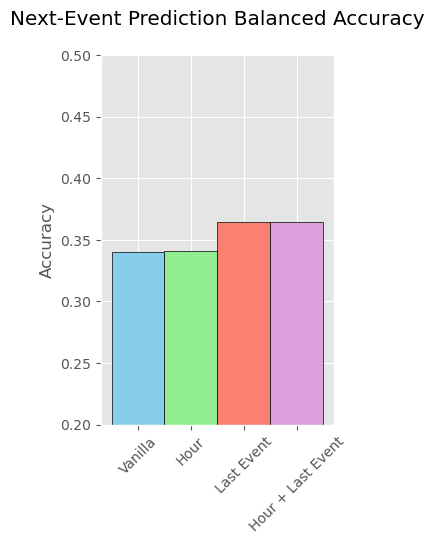

In [310]:
plot_model_prediction_accuracies(vanilla_balanced_accuracy, intraday_balanced_accuracy, excitation_balanced_accuracy, combined_balanced_accuracy)

#### Time to Next Event

In [ ]:
model = tf.keras.models.load_model('DQR_baseline_Q1.keras',compile = False)
trained_my_intraday_model = tf.keras.models.load_model('DQR_intraday_Q1.keras',compile = False)
trained_my_excitation_model = tf.keras.models.load_model('DQR_excitation_Q1.keras',compile = False)
combined_model = tf.keras.models.load_model('3month_DQR_combined_Q1.keras',compile = False)

In [59]:
baseline_preds = model.predict(test_df['Normalised_Current_Size'])
intraday_preds = trained_my_intraday_model.predict([test_df['Normalised_Current_Size'],test_df['Hour']])
excitation_preds = trained_my_excitation_model.predict([test_df['Normalised_Current_Size'],test_df['Prev_Event_Type']])
combined_preds = combined_model.predict([test_df['Normalised_Current_Size'],test_df['Hour'],test_df['Prev_Event_Type']])
pred_lst = [baseline_preds,intraday_preds,excitation_preds,combined_preds]

5713/5713 ━━━━━━━━━━━━━━━━━━━━ 2s 288us/step
 413/5713 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Queue_Size', 'Hour']. Received: the structure of inputs=('*', '*')
  warnings.warn(


5713/5713 ━━━━━━━━━━━━━━━━━━━━ 2s 416us/step
 376/5713 ━━━━━━━━━━━━━━━━━━━━ 2s 407us/step

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Queue_Size', 'Prev_Event_Type']. Received: the structure of inputs=('*', '*')
  warnings.warn(


5713/5713 ━━━━━━━━━━━━━━━━━━━━ 2s 409us/step
 378/5713 ━━━━━━━━━━━━━━━━━━━━ 2s 403us/step

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Queue_Size', 'Hour', 'Prev_Event']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


5713/5713 ━━━━━━━━━━━━━━━━━━━━ 2s 400us/step


In [302]:
relative_acc = pd.DataFrame()
relative_acc['actual'] = test_df['Delta_t']
my_map = dict(zip(range(4),['Vanilla','Hour','Last Event','Hour + Last Event']))
for i in range(len(pred_lst)):
    relative_acc[my_map[i]] = 1/np.sum(pred_lst[i],axis=1)
    relative_acc[my_map[i]] = (relative_acc[my_map[i]]-relative_acc.actual).abs()/(relative_acc.actual.mean())

In [304]:
relative_acc.describe()

,actual,Vanilla,Hour,Last Event,Hour + Last Event
count,1.842810e+05,184281.000000,184281.000000,1.842810e+05,184281.000000
mean,4.655651e-01,0.844230,0.796361,8.541022e-01,0.831646
std,1.070874e+00,1.805070,1.742945,1.786720e+00,1.717731
min,5.447600e-07,0.000016,0.000006,8.273584e-08,0.000012
25%,8.492990e-02,0.307878,0.263777,3.439599e-01,0.306585
50%,2.218219e-01,0.549876,0.472413,6.042917e-01,0.536779
75%,5.142133e-01,0.725128,0.794127,7.940315e-01,0.880219
max,6.819636e+01,114.429073,132.787442,1.313788e+02,132.454166


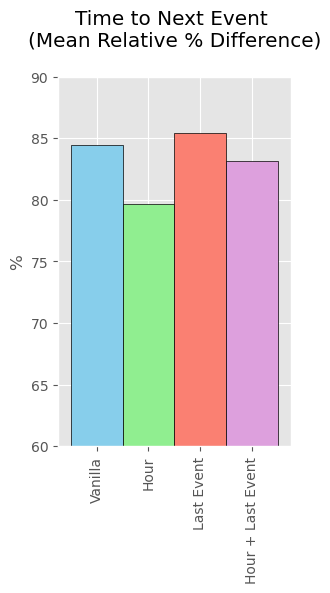

In [306]:
f = plt.figure()
f.set_figwidth(3)

(100*relative_acc.drop(['actual'],axis = 1).mean(axis=0)).plot.bar(color=["skyblue", "lightgreen", "salmon", "plum"],width = 1.0,edgecolor = 'black')
plt.ylim((60,90))
plt.title("Time to Next Event \n(Mean Relative % Difference)\n")
plt.ylabel("%")
plt.show()

#### Log Likelihood

In [525]:
ll_df = pd.DataFrame(np.log(baseline_preds + 1e-6))

In [65]:
baseline_preds[range(len(test_df.Event_Type.values)),test_df.Event_Type.values]

array([0.20957395, 0.20951721, 0.20938262, ..., 1.2493706 , 1.2493744 ,
       1.2493783 ], dtype=float32)

In [77]:
baseline_ll = np.mean(np.log(baseline_preds[range(len(test_df.Event_Type.values)),test_df.Event_Type.values]) - 
        baseline_preds.sum(axis=1)*test_df.Delta_t.values)
intraday_ll = np.mean(np.log(intraday_preds[range(len(test_df.Event_Type.values)),test_df.Event_Type.values]) - 
        intraday_preds.sum(axis=1)*test_df.Delta_t.values)
excitation_ll = np.mean(np.log(excitation_preds[range(len(test_df.Event_Type.values)),test_df.Event_Type.values]) - 
        excitation_preds.sum(axis=1)*test_df.Delta_t.values)
combined_ll = np.mean(np.log(combined_preds[range(len(test_df.Event_Type.values)),test_df.Event_Type.values]) - 
        combined_preds.sum(axis=1)*test_df.Delta_t.values)

In [141]:
ll_list = np.array([baseline_ll,intraday_ll,excitation_ll,combined_ll])
print(ll_list)

[-1.03168406 -0.98895946 -0.99329553 -0.94314915]


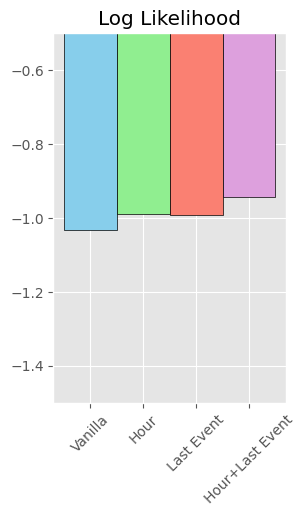

In [155]:
f = plt.figure()
f.set_figwidth(3)

plt.bar(x = ['Vanilla','Hour','Last Event','Hour+Last Event'],height = ll_list,color=["skyblue", "lightgreen", "salmon", "plum"],
        width = 1.0,edgecolor = 'black')
plt.ylim((-1.5,-.5))
plt.title("Log Likelihood")
plt.xticks(rotation = 45)
plt.show()

## Multi Dimensional QR Model

#### Preprocessing

In [6]:
def get_trade_imbalance(df):
    #deep copy to keep original intact
    a = df.copy()

    #Only market orders are trades, create a column that is 1 when a buy (or sell) occurs and 0 otherwise
    a['Buy'] = (abs(a['Change'])*((a['Queue'] > 0)&(a['Event'] == 'market'))).astype(int)
    a['Sell'] = (abs(a['Change'])*((a['Queue'] < 0)&(a['Event'] == 'market'))).astype(int)
    a['dt'] = pd.to_datetime(a["Time"], unit='s')

    #buy/sell volumes over the lookback windows of interest    
    trade_20s = a[['dt','Buy','Sell']].rolling('20s',on='dt').sum().drop(['dt'],axis = 1)
    trade_20s = trade_20s.rename(columns = {'Buy':'Buy_20s','Sell':'Sell_20s'})
    
    trade_1min = a[['dt','Buy','Sell']].rolling('60s',on='dt').sum().drop(['dt'],axis = 1)
    trade_1min = trade_1min.rename(columns = {'Buy':'Buy_1min','Sell':'Sell_1min'})
    
    trade_5min = a[['dt','Buy','Sell']].rolling('300s',on='dt').sum().drop(['dt'],axis=1)
    trade_5min = trade_5min.rename(columns = {'Buy':'Buy_5min','Sell':'Sell_5min'})
    
    trade_15min = a[['dt','Buy','Sell']].rolling('900s',on='dt').sum().drop(['dt'],axis = 1)
    trade_15min = trade_15min.rename(columns = {'Buy':'Buy_15min','Sell':'Sell_15min'})

    #joining them with the main dataframe
    df = pd.merge(a,trade_20s,right_index = True,left_index = True)
    df = pd.merge(df,trade_1min,right_index = True,left_index = True)
    df = pd.merge(df,trade_5min,right_index = True,left_index = True)
    df = pd.merge(df,trade_15min,right_index = True,left_index = True)

    #calculting imbalance
    df['imbalance_20s'] = (df.Sell_20s - df.Buy_20s)/(df.Sell_20s + df.Buy_20s)
    df['imbalance_1min'] = (df.Sell_1min - df.Buy_1min)/(df.Sell_1min + df.Buy_1min)
    df['imbalance_5min'] = (df.Sell_5min - df.Buy_5min)/(df.Sell_5min + df.Buy_5min)
    df['imbalance_15min'] = (df.Sell_15min - df.Buy_15min)/(df.Sell_15min + df.Buy_15min)
   
    df = df.fillna(0)

    return df[['Spread','imbalance_20s','imbalance_1min','imbalance_5min','imbalance_15min']]
    

In [8]:
hours_per_day = 9
def mdqr_preprocess(df):

    
    event_map = dict(zip(['limit','cancel','market'],range(3)))
    queue_list = list(sorted(df.Queue.unique()))
    queue_map = dict(zip(queue_list,range(len(queue_list))))

    #Get the numeric features
    
    numeric_feats = ['bid5_size','bid4_size','bid3_size','bid2_size','bid1_size','ask1_size','ask2_size','ask3_size','ask4_size','ask5_size',
     'Spread', 'imbalance_20s','imbalance_1min','imbalance_5min','imbalance_15min']
    
    numeric_features = get_trade_imbalance(df)

    ob_sizes = ['bid5_size','bid4_size','bid3_size','bid2_size','bid1_size','ask1_size','ask2_size','ask3_size','ask4_size','ask5_size']
    for col in ob_sizes:    
        numeric_features[col] = np.log(df[col] + 1)
 
    numeric_features = numeric_features[numeric_feats] #reordering

    #get the previous event features
    
    prev_event_feats = ['q-5_last_event','q-4_last_event','q-3_last_event','q-2_last_event','q-1_last_event',
                        'q1_last_event','q2_last_event','q3_last_event','q4_last_event','q4_last_event']
    
    prev_event_features = df[['Queue','Event']]

    for q in queue_list:
        prev_event = prev_event_features[prev_event_features.Queue == q].Event.shift(1)
        prev_event = pd.DataFrame(prev_event).rename(columns = {0:'rkey','Event':'q'+str(q)+'_last_event'})
        prev_event_features = pd.merge(prev_event_features,prev_event,how = 'left',left_index = True,right_index = True).bfill()
        prev_event_features['q'+str(q)+'_last_event'] = prev_event_features['q'+str(q)+'_last_event'].map(event_map).ffill().astype(int)

    prev_event_features = prev_event_features[prev_event_feats]
        

    #get the hour feature
    hr_feature = pd.DataFrame()
    hr_feature['Hour'] = ((df['Time'] % (3600*hours_per_day)//3600)).astype(int)

    #get the y_train features
    ys = pd.DataFrame()
    ys['delta_t'] = df['Time'].diff().fillna(0)
    ys['Event_Type'] = df.Event.map(event_map).astype(int)
    ys['Queue_Index'] = df.Queue.map(queue_map).astype(int)
    
    

    return numeric_features,prev_event_features,hr_feature,ys
    

#### Model

In [11]:
def mdqr_loss(y_true, y_pred):
    """
    Custom loss function based on log-likelihood for event intensities.

    Args:
        y_true: Tensor (batch_size, 3) → (event_type, event_queue, delta_t)
        y_pred: Tensor (batch_size, 3, 10) → [bid_5 -> (λ_L, λ_C, λ_M), 
                                              bid_4 -> (λ_L, λ_C, λ_M),
                                              ....,
                                              ask_5 -> (λ_L, λ_C, λ_M)]

    Returns:
        Scalar loss value.
    """
    event_type = tf.cast(y_true[:,0], tf.int32) # Convert event type to integer
    event_queue = tf.cast(y_true[:,1],tf.int32) #queue in which the event occurred
    delta_t = y_true[:,2]  # Inter-event time

    lookup = event_queue*3 + event_type

    lambda_total = tf.reduce_sum(y_pred,axis=1)  # Sum of all intensities
    lambda_eta = tf.gather(y_pred, lookup, axis=1, batch_dims=1)
    #lambda_eta = tf.gather(lambda_eta, event_type,axis = 1, batch_dims=1)  # Pick correct event intensity

    log_likelihood = tf.math.log(lambda_eta + 1e-6) - lambda_total * delta_t  # Small epsilon to avoid log(0)

    return -tf.reduce_mean(log_likelihood)  # Take mean loss over batch

In [13]:
# build function for intraday
#same loss function as per usual

def build_mdqr_model():
    """

    Returns:
        model (tf.keras.Model): Compiled Keras model.
    """

    #input for the numerical features
    numerical_input = Input(shape=(15,), name="Numerical_Features")


    hour_input = Input(shape=(1,), name="Hour")

    last_event_input = Input(shape=(10,),name = "Prev_Event")


    hour_embedding = Embedding(input_dim=hours_per_day, output_dim=2, name="Hour_Embedding")(hour_input)
    hour_embedding = Flatten()(hour_embedding)

    last_event_embedding = Embedding(input_dim=3, output_dim=2, name="Prev_Event_Embedding")(last_event_input)
    last_event_embedding = Flatten()(last_event_embedding)

    merged = Concatenate()([numerical_input, hour_embedding,last_event_embedding])

    
    # Two hidden layers with tanh activation, with batch normalization after each dense layer
    hidden = Dense(256)(merged)
    activation = Activation('tanh')(hidden)
    #batch_norm = BatchNormalization()(activation)
    hidden = Dense(64)(activation)
    activation = Activation('tanh')(hidden)
    #batch_norm = BatchNormalization()(activation)

    # Output layer: 3 neurons for the intensity functions.
    # Use relu activation to ensure positivity.
    output = Dense(30, activation="relu", name="Intensity_Output")(activation)
    #output = Reshape((10, 3))(output)

    model = Model(inputs=[numerical_input, hour_input,last_event_input], outputs=output)

    # Compile the model using Adam with a learning rate of 1e-5 and our custom loss.
    model.compile(optimizer=Adam(learning_rate=1e-5), loss=mdqr_loss)
    
    return model



In [15]:
#function to train intraday model
#def mdqr_model(df, batch_size=64, epochs=50):
def mdqr_model(x_num,x_event,x_hour,ys, batch_size=64, epochs=50):
    """
    Trains the simplified DQR model.

    Args:
        df (pd.DataFrame): Preprocessed dataset.
        batch_size (int): Batch size.
        epochs (int): Number of epochs.

    Returns:
        model (tf.keras.Model): Trained model.
        history (tf.keras.callbacks.History): Training history.
    """

    train_num, val_num = train_test_split(x_num, test_size=0.2, random_state=1)
    train_event, val_event = train_test_split(x_event, test_size=0.2, random_state=1)
    train_hour, val_hour = train_test_split(x_hour, test_size=0.2, random_state=1)
    train_ys, val_ys = train_test_split(ys, test_size=0.2, random_state=1)
    
    # Train-validation split (80:20)
    #train_df, val_df = train_test_split(df, test_size=0.2, random_state=1)


    
    X_train_num = np.array(train_num)
    X_train_hr = train_hour['Hour'].values.reshape(-1,1)
    X_train_event = np.array(train_event)
    X_train = [X_train_num,X_train_hr,X_train_event]

    
    X_val_num = np.array(val_num)
    X_val_hr = val_hour['Hour'].values.reshape(-1,1)
    X_val_event = np.array(val_event)
    X_val = [X_val_num,X_val_hr,X_val_event]


    y_train = np.stack([train_ys['Event_Type'],train_ys['Queue_Index'],train_ys['delta_t']],axis = 1)
    y_val = np.stack([val_ys['Event_Type'],val_ys['Queue_Index'],val_ys['delta_t']],axis = 1)

    # Build the model
    model = build_mdqr_model()

    early_stopping = EarlyStopping(
    monitor='val_loss',        # You can monitor validation loss or accuracy
    patience=20,               # Stop after 10 epochs without improvement
    restore_best_weights=False  # Restore the model weights from the best epoch
    )

    mcp_save = ModelCheckpoint('best_weights.keras', save_best_only=True, monitor='val_loss', mode='min')

    lr_scheduler = LearningRateScheduler(cyclic_lr, verbose=1)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        batch_size=batch_size, epochs=epochs, verbose=1,callbacks = [lr_scheduler,early_stopping,mcp_save])

    return model, history


In [17]:
a = pd.read_csv('3_month_sim_v2')

In [18]:
x1,x2,x3,y1 = mdqr_preprocess(a)

In [19]:
del(a)

In [ ]:
del(x1)
del(x2)
del(x3)
del(y1)

In [41]:
model = mdqr_model(x1,x2,x3,y1, batch_size=64, epochs=50)[0]


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['Numerical_Features', 'Hour', 'Prev_Event']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


217770/217770 ━━━━━━━━━━━━━━━━━━━━ 132s 599us/step - loss: 2.1892 - val_loss: 1.1207 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.2500950416433626e-05.
Epoch 2/50
217770/217770 ━━━━━━━━━━━━━━━━━━━━ 127s 580us/step - loss: 1.1164 - val_loss: 1.1114 - learning_rate: 1.2501e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.00016883054563804762.
Epoch 3/50
217770/217770 ━━━━━━━━━━━━━━━━━━━━ 131s 601us/step - loss: 1.1267 - val_loss: 1.1060 - learning_rate: 1.6883e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007069780313601951.
Epoch 4/50
217770/217770 ━━━━━━━━━━━━━━━━━━━━ 128s 587us/step - loss: 1.1405 - val_loss: 1.1499 - learning_rate: 7.0698e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00012436499066713623.
Epoch 5/50
217770/217770 ━━━━━━━━━━━━━━━━━━━━ 130s 594us/step - loss: 1.1071 - val_loss: 1.1029 - learning_rate: 1.2436e-04

Epoch 6: LearningRateScheduler setting learning rate to 0.000248524

KeyboardInterrupt: 

In [307]:
model.save('MDQRModel_option3.keras')

In [43]:
model = tf.keras.models.load_model('MDQRModel.keras',compile=False)

In [ ]:
x4,x5,x6,y2 = mdqr_preprocess(b)

#### Attempt 2 (Not Used in Final Report)

In [ ]:
hours_per_day = 9
def mdqr_preprocess2(df):

    
    event_map = dict(zip(['limit','cancel','market'],range(3)))
    queue_list = list(sorted(df.Queue.unique()))
    queue_map = dict(zip(queue_list,range(len(queue_list))))

    #Get the numeric features
    
    numeric_feats = ['bid5_size','bid4_size','bid3_size','bid2_size','bid1_size','ask1_size','ask2_size','ask3_size','ask4_size','ask5_size',
     'Spread']
    
    numeric_features = pd.DataFrame(df.Spread)

    ob_sizes = ['bid5_size','bid4_size','bid3_size','bid2_size','bid1_size','ask1_size','ask2_size','ask3_size','ask4_size','ask5_size']
    for col in ob_sizes:    
        numeric_features[col] = np.log(df[col] + 1)
 
    numeric_features = numeric_features[numeric_feats] #reordering

    #get the previous event features
    
    prev_event_feats = ['q-5_last_event','q-4_last_event','q-3_last_event','q-2_last_event','q-1_last_event',
                        'q1_last_event','q2_last_event','q3_last_event','q4_last_event','q4_last_event']
    
    prev_event_features = df[['Queue','Event']]

    for q in queue_list:
        prev_event = prev_event_features[prev_event_features.Queue == q].Event.shift(1)
        prev_event = pd.DataFrame(prev_event).rename(columns = {0:'rkey','Event':'q'+str(q)+'_last_event'})
        prev_event_features = pd.merge(prev_event_features,prev_event,how = 'left',left_index = True,right_index = True).bfill()
        prev_event_features['q'+str(q)+'_last_event'] = prev_event_features['q'+str(q)+'_last_event'].map(event_map).ffill().astype(int)

    prev_event_features = prev_event_features[prev_event_feats]
        

    #get the hour feature
    hr_feature = pd.DataFrame()
    hr_feature['Hour'] = ((df['Time'] % (3600*hours_per_day)//3600)).astype(int)

    #get the y_train features
    ys = pd.DataFrame()
    ys['delta_t'] = df['Time'].diff().fillna(0)
    ys['Event_Type'] = df.Event.map(event_map).astype(int)
    ys['Queue_Index'] = df.Queue.map(queue_map).astype(int)
    
    

    return numeric_features,prev_event_features,hr_feature,ys
    

In [ ]:
# build function for intraday
#same loss function as per usual

def build_mdqr_model2():
    """

    Returns:
        model (tf.keras.Model): Compiled Keras model.
    """

    #input for the numerical features
    numerical_input = Input(shape=(11,), name="Numerical_Features")


    hour_input = Input(shape=(1,), name="Hour")

    last_event_input = Input(shape=(10,),name = "Prev_Event")


    hour_embedding = Embedding(input_dim=hours_per_day, output_dim=2, name="Hour_Embedding")(hour_input)
    hour_embedding = Flatten()(hour_embedding)

    last_event_embedding = Embedding(input_dim=3, output_dim=2, name="Prev_Event_Embedding")(last_event_input)
    last_event_embedding = Flatten()(last_event_embedding)

    merged = Concatenate()([numerical_input, hour_embedding,last_event_embedding])

    
    # Two hidden layers with tanh activation, with batch normalization after each dense layer
    hidden = Dense(256)(merged)
    activation = Activation('tanh')(hidden)
    #batch_norm = BatchNormalization()(activation)
    
    hidden = Dense(64)(activation)
    activation = Activation('tanh')(hidden)
    #batch_norm = BatchNormalization()(activation)

    # Output layer: 3 neurons for the intensity functions.
    # Use relu activation to ensure positivity.
    output = Dense(30, activation="relu", name="Intensity_Output")(activation)
    #output = Reshape((10, 3))(output)

    model = Model(inputs=[numerical_input, hour_input,last_event_input], outputs=output)

    # Compile the model using Adam with a learning rate of 1e-5 and our custom loss.
    model.compile(optimizer=Adam(learning_rate=1e-5), loss=mdqr_loss)
    
    return model



In [ ]:
#function to train intraday model
#def mdqr_model(df, batch_size=64, epochs=50):
def mdqr_model2(x_num,x_event,x_hour,ys, batch_size=64, epochs=50):
    """
    Trains the simplified DQR model.

    Args:
        df (pd.DataFrame): Preprocessed dataset.
        batch_size (int): Batch size.
        epochs (int): Number of epochs.

    Returns:
        model (tf.keras.Model): Trained model.
        history (tf.keras.callbacks.History): Training history.
    """

    train_num, val_num = train_test_split(x_num, test_size=0.2, random_state=1)
    train_event, val_event = train_test_split(x_event, test_size=0.2, random_state=1)
    train_hour, val_hour = train_test_split(x_hour, test_size=0.2, random_state=1)
    train_ys, val_ys = train_test_split(ys, test_size=0.2, random_state=1)
    
    # Train-validation split (80:20)
    #train_df, val_df = train_test_split(df, test_size=0.2, random_state=1)


    
    X_train_num = np.array(train_num)
    X_train_hr = train_hour['Hour'].values.reshape(-1,1)
    X_train_event = np.array(train_event)
    X_train = [X_train_num,X_train_hr,X_train_event]

    
    X_val_num = np.array(val_num)
    X_val_hr = val_hour['Hour'].values.reshape(-1,1)
    X_val_event = np.array(val_event)
    X_val = [X_val_num,X_val_hr,X_val_event]


    y_train = np.stack([train_ys['Event_Type'],train_ys['Queue_Index'],train_ys['delta_t']],axis = 1)
    y_val = np.stack([val_ys['Event_Type'],val_ys['Queue_Index'],val_ys['delta_t']],axis = 1)

    # Build the model
    model = build_mdqr_model2()

    early_stopping = EarlyStopping(
    monitor='val_loss',        # You can monitor validation loss or accuracy
    patience=10,               # Stop after 10 epochs without improvement
    restore_best_weights=False  # Restore the model weights from the best epoch
    )

    lr_scheduler = LearningRateScheduler(cyclic_lr, verbose=1)

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        batch_size=batch_size, epochs=epochs, verbose=1,callbacks = [lr_scheduler,early_stopping])

    return model, history


In [ ]:
x1,x2,x3,y1 = mdqr_preprocess2(a)

In [ ]:
model = mdqr_model2(x1,x2,x3,y1, batch_size=128, epochs=10)[0]

#### Results

In [1011]:
mdqr_model = tf.keras.models.load_model('MDQRModel_option2.keras',compile=False)
#mdqr_model2= tf.keras.models.load_model('MDQRModel2.keras',compile=False)

In [3550]:
q = 5
hour = np.array(5*np.zeros(50)).T
spread = 1*np.ones(50)
imbs = 0*np.ones((50,4))
prev_event = np.array(50*[1*np.ones(10)])
queue_sizes = 20*np.ones((50,10))
queue_sizes[:,q-1] = 20*np.ones(50)
queue_sizes[:,q] = np.linspace(0,49,50)
num = np.hstack([np.log(1+queue_sizes),np.array([spread]).T,imbs])
pp = model.predict([num,hour,prev_event])

prev_event = np.array(50*[0*np.ones(10)])
pp2 = model.predict([num,hour,prev_event])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/var/folders/_v/56nmhlvd1mj7w9kjvknmmy700000gn/T/ipykernel_55480/2371873737.py:3: RuntimeWarning: divide by zero encountered in divide
  rho = qq_int[:,0]/np.roll(np.sum(qq_int[:,1:],axis = 1),-1)


Text(0.5, 1.0, 'Arrival Departure Ratio and Latent Distribution')

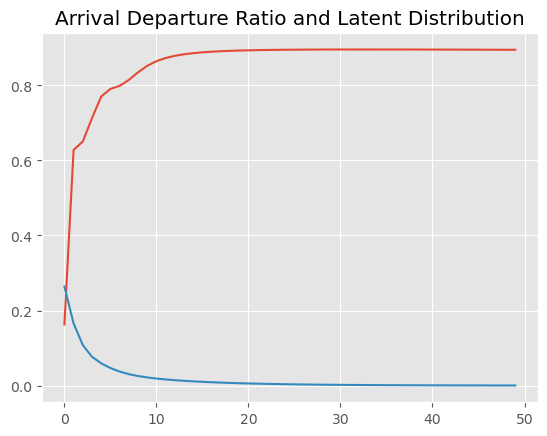

In [3516]:
opp_lg = np.array([arr.reshape(10,3) for arr in pp])
qq_int = 0.5*(x[:,q,:] + y[:,q,:])
rho = qq_int[:,0]/np.roll(np.sum(qq_int[:,1:],axis = 1),-1)
rho[-1] = rho[-2]
pi_0 = 1/(1 + np.sum(np.cumprod(rho))) 
pi = pi_0*np.cumprod(rho)
pi = pi/np.sum(pi) #invariant distribution of the level of the OB
plt.plot(rho)
plt.plot(pi)
plt.title("Arrival Departure Ratio and Latent Distribution")
#rng = np.random.default_rng()
#size = rng.choice(len(pi),p = pi)

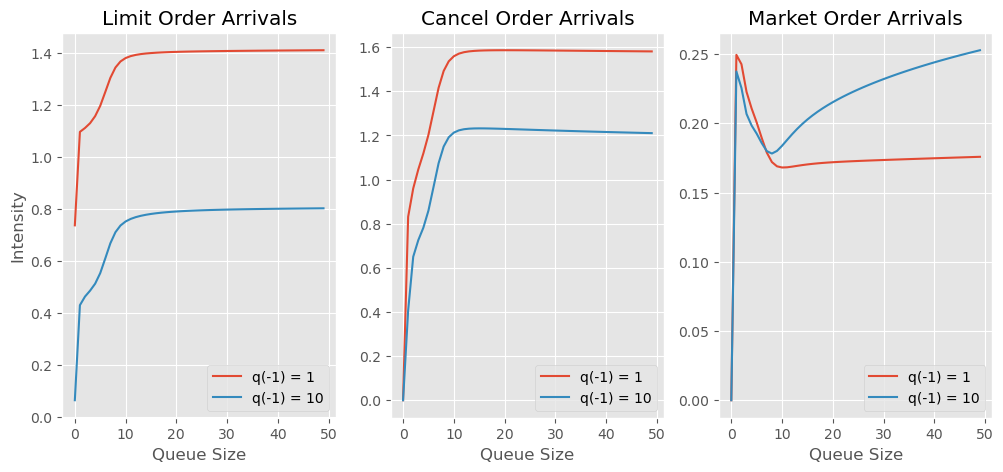

In [3548]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

labels = ['q(-1) = 1','q(-1) = 10']

axes[0].plot(opp_small[:,q,0])
axes[0].plot(opp_lg[:,q,0])
axes[0].legend(labels)
axes[0].set_xlabel("Queue Size")
axes[0].set_ylabel("Intensity")
axes[0].set_title("Limit Order Arrivals")



axes[1].plot(opp_small[:,q,1])
axes[1].plot(opp_lg[:,q,1])
axes[1].legend(labels)
axes[1].set_xlabel("Queue Size")
axes[1].set_title("Cancel Order Arrivals")

axes[2].plot(opp_small[:,q,2])
axes[2].plot(opp_lg[:,q,2])
axes[2].legend(labels)
axes[2].set_xlabel("Queue Size")
axes[2].set_title("Market Order Arrivals")
plt.show()


In [3590]:
q = 5
hour = np.linspace(0,8,9).astype(int)
spread = 1*np.ones(9)
imbs = 0*np.ones((9,4))
prev_event = np.array(9*[0*np.ones(10)])
queue_sizes = 20*np.ones((9,10))
#queue_sizes[:,q-1] = 20*np.ones(50)
#queue_sizes[:,q] = np.linspace(0,49,50)
num = np.hstack([np.log(1+queue_sizes),np.array([spread]).T,imbs])
pp2 = model.predict([num,hour,prev_event])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


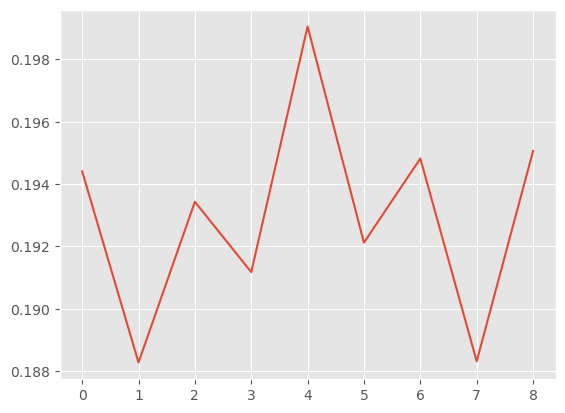

In [3602]:
time_of_day = np.array([arr.reshape(10,3) for arr in pp2])
plt.plot(time_of_day[:,5,2])

## Simulating Data in the MDQR

In [3238]:
class MDQRSimulator():
    def __init__(self,start_state,model,max_time,qr_intensities):
        self.time = 0
        self.state = np.array(start_state)
        self.model = model
        self.max_time = max_time
        
        self.spread = 1
        self.prev_events = np.random.choice(3,10)
        self.trade_imbalances = np.zeros(4)

        
        self.flow = []
        self.lookback = np.array([np.zeros(2)])

        self.theta = 0.6
        self.theta_reinit = 0.01
        self.theta_shock = 0.0001
        self.latent_intensities = qr_intensities

    def update_trade_imbalance(self):
        lookback_times = [20,60,300,1500]

        for (i,t) in enumerate(lookback_times):
            within = ((self.time - self.lookback[:,0])<t)
            num = np.sum((within*(self.lookback[:,1])))
            denom = np.sum((within*(np.abs(self.lookback[:,1]))))
            self.trade_imbalances[i] = num/denom if denom !=0 else 0
            
        self.lookback = np.delete(self.lookback, np.where(self.lookback[:,0] < self.time - 1500),axis = 0)


    def redraw(self,intensity):
        rho = intensity[:,0]/np.roll(np.sum(intensity[:,1:],axis = 1),-1)
        rho[-1] = rho[-2]
        pi_0 = 1/(1 + np.sum(np.cumprod(rho))) 
        pi = pi_0*np.cumprod(rho)
        pi = pi/np.sum(pi) #invariant distribution of the level of the OB
        
        rng = np.random.default_rng()
        size = rng.choice(len(pi),p = pi)

        return size
        

    #shifting the order book and redrawing the empty queue
    #used when one of the central limits goes to 0 and pref moves
    def roll_ob(self,q):

        #roll over the order book sizes, redraw the missing size
        size = self.redraw(self.latent_intensities[0,:,:])
        end_point = (-q-1)//2 
        self.state = np.roll(self.state,-q)
        self.state[end_point] = size

    
    #used when there is an exogenous shock causing the OB to be redrawn (ref price remains the same though)
    def full_redraw(self):
        baseline = self.latent_intensities[:5,:,:]
        bid_sizes = []
        ask_sizes = []
        for i in range(len(baseline)):
            intensity = baseline[i]
            bid_size = self.redraw(intensity)
            ask_size = self.redraw(intensity)
            bid_sizes.append(bid_size)
            ask_sizes.append(ask_size)

        self.state = np.append(bid_sizes,list(reversed(ask_sizes)))

        
    def simulate(self):
        levels = {0:-5,1:-4,2:-3,3:-2,4:-1,5:1,6:2,7:3,8:4,9:5}
        event_types = {2:(-1,'market'),1:(-1,'cancel'),0:(1,'limit')}

        while self.time < self.max_time:

            lookup_vals = np.minimum(self.state,40)

            #self.update_trade_imbalance()
            hour = self.time % (3600*hours_per_day)//3600
            numeric_feats = np.hstack([np.log(1+lookup_vals),np.array([self.spread]).T,self.trade_imbalances])
            transition_matrix = model.predict([np.array([numeric_feats]),np.array([hour]).T,np.array([self.prev_events])],verbose = 0).reshape(10,3)

            transition_matrix[:,1] = transition_matrix[:,1]*(self.state > 0)
            transition_matrix[:,2] = transition_matrix[:,2]*(self.state > 0)

            #picking next event and queue
            total_rate = np.sum(transition_matrix)
            waiting_time = np.random.exponential(1 / total_rate)
    
            queue_level_probability = np.sum(transition_matrix,axis = 1)/total_rate
            rng = np.random.default_rng()
            
            #which queue the event will belong to
            event_queue = rng.choice(10,p = queue_level_probability)
            #which type of event is occuring within that queue
            event = rng.choice(3,p = transition_matrix[event_queue]/np.sum(transition_matrix[event_queue]))

            (change,type) = event_types[event]
            
            q = levels[event_queue]

            
            self.state[event_queue] += change
            self.prev_events[event_queue] = event
            self.time += waiting_time

            if type == 'market' :
                self.lookback = np.append(self.lookback,[np.array([self.time,q/abs(q)])],axis = 0)


            self.flow.append([self.time,q,change,type,self.state[event_queue],self.spread,self.state[0],self.state[1],self.state[2],
                              self.state[3],self.state[4],self.state[5],self.state[6],self.state[7],self.state[8],self.state[9]])



            if abs(q) == 1:
                #if liquidity in first queue was consumed or liquidity was just placed in an empty first queue
                if (self.state[event_queue] == 0 or (self.state[event_queue] == 1 and change == 1)):
                    if (rng.choice(2,p = [1-self.theta,self.theta]) == 1):
                        self.roll_ob(q)#shift the queues over and redraw the final one. 
                        self.prev_events = np.random.choice(3,10)
                        if (rng.choice(2,p = [1-self.theta_reinit,self.theta_reinit]) == 1):
                            self.full_redraw() 

            if (rng.choice(2,p = [1-self.theta_shock,self.theta_shock]) == 1):
                            self.full_redraw()

        return pd.DataFrame(self.flow,columns = 
                            ['Time','Queue','Change','Event','Current Size','Spread',
                             'bid5_size','bid4_size','bid3_size','bid2_size','bid1_size','ask1_size',
                             'ask2_size','ask3_size','ask4_size','ask5_size'])
            
    
        

In [3240]:
mdqr_sim = MDQRSimulator(10*[10],model,32400,qr_intensities)

In [3242]:
start = time.time()
mdqr_test_df = mdqr_sim.simulate()
end = time.time()
print(end-start)

/var/folders/_v/56nmhlvd1mj7w9kjvknmmy700000gn/T/ipykernel_55480/2827549641.py:34: RuntimeWarning: divide by zero encountered in divide
  rho = intensity[:,0]/np.roll(np.sum(intensity[:,1:],axis = 1),-1)


10090.154578208923


In [3243]:
mdqr_test_df.to_csv('MDQR_Simulation_Day1.csv')

In [3244]:
start = time.time()
mdqr_test_df2 = mdqr_sim.simulate()
end = time.time()
print(end-start)

5.627499103546143


## MDQR Analysis and Validation Tests

In [3628]:
emp_df = ob.simulate()

/var/folders/_v/56nmhlvd1mj7w9kjvknmmy700000gn/T/ipykernel_55480/3426082802.py:88: RuntimeWarning: divide by zero encountered in divide
  rho = intensity[:,2]/np.roll(np.sum(intensity[:,:2],axis = 1),-1)


In [3462]:
## function to reproduce the plot on the top of page 21
#imput initial simulation and then simulation generated from MDQR intensities
def plot_queue_size_and_quantiles(emp_df, MDQR_sim_df,qr_df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].hist(emp_df['bid1_size'], bins=50, histtype="step", color="red", label="Empirical",density=True)
    axes[0].hist(MDQR_sim_df['bid1_size'], bins=50, histtype="step", color="blue", label="MDQR",density=True)
    axes[0].hist(qr_df['bid1_size'], bins=50, histtype="step", color="green", label="QR",density=True)
    axes[0].set_xlim((-1,100))
    axes[0].set_xlabel("Queue Size")
    axes[0].set_ylabel("Density")
    axes[0].legend()


    real_sorted = np.sort(emp_df["bid1_size"].values)
    mdqr_sorted = np.sort(MDQR_sim_df["bid1_size"].values)
    qr_sorted = np.sort(qr_df["bid1_size"].values)

    quantiles = np.linspace(0, 1, 500)

    real_quantiles = np.percentile(real_sorted, quantiles * 100)
    mdqr_quantiles = np.percentile(mdqr_sorted, quantiles * 100)
    qr_quantiles = np.percentile(qr_sorted, quantiles * 100)
    
    
    plt.scatter(real_quantiles, qr_quantiles, color='skyblue', label='QR')
    plt.scatter(real_quantiles, mdqr_quantiles, color='salmon', label='MDQR')
    
    plt.plot([min(real_quantiles), max(real_quantiles)],
         [min(real_quantiles), max(real_quantiles)],
         color='seagreen', linestyle='--')

    plt.xlabel('Empirical Quantiles')
    plt.ylabel('Model Quantiles')
    plt.title('QQ Plot against Empirical Distribution')
    plt.legend()

    # Show the plot
    plt.show()



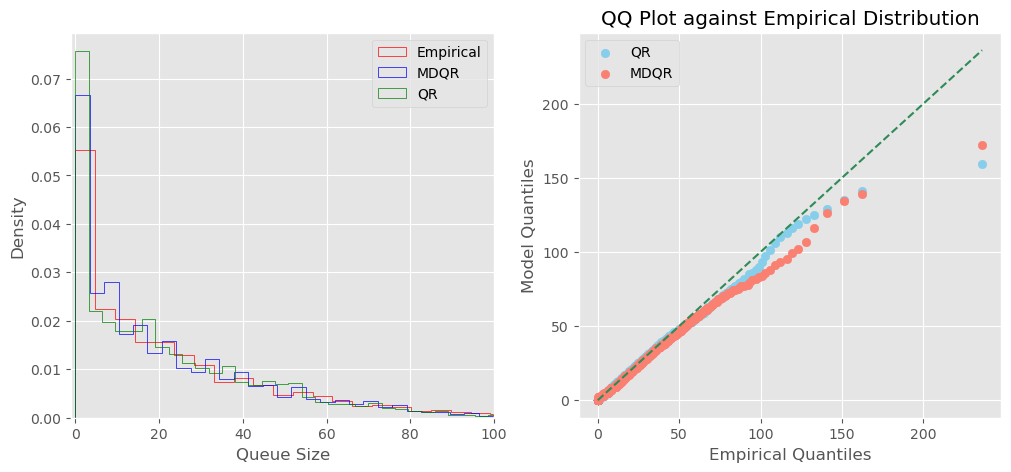

In [3464]:
plot_queue_size_and_quantiles(emp_df, mdqr_test_df,qr_df)

In [3430]:
#function to plot average queues volume on page 22
#imput initial simulation and then simulation generated from MDQR intensities
def plot_avg_queue_size(emp_df, MDQR_sim_df,qr_df):
    emp_avgs = []
    MDQR_avgs=[]
    QR_avgs = []
    for i in range(1,6):
        emp_avgs.append(emp_df[f'ask{i}_size'].mean())
        MDQR_avgs.append(MDQR_sim_df[f'ask{i}_size'].mean())
        QR_avgs.append(qr_df[f'ask{i}_size'].mean())

    price_levels = [f'ask-{i}' for i in range(5)]
    x = np.arange(len(price_levels))
    width = 0.3

    fig, ax = plt.subplots(figsize=(8,5))

    ax.bar(x - width, emp_avgs, width, label="Empirical", color="salmon")
    ax.bar(x , MDQR_avgs, width, label="MDQR", color="plum")
    ax.bar(x +width, QR_avgs, width, label="QR", color="seagreen")

    ax.set_xlabel("Price Level")
    ax.set_ylabel("Queue Volume")
    ax.set_xticks(x)
    ax.set_xticklabels(price_levels)
    ax.set_title("Average Volumes in Ask Queues")
    ax.legend()
    plt.savefig('AvgVolumes.png')

    plt.show()

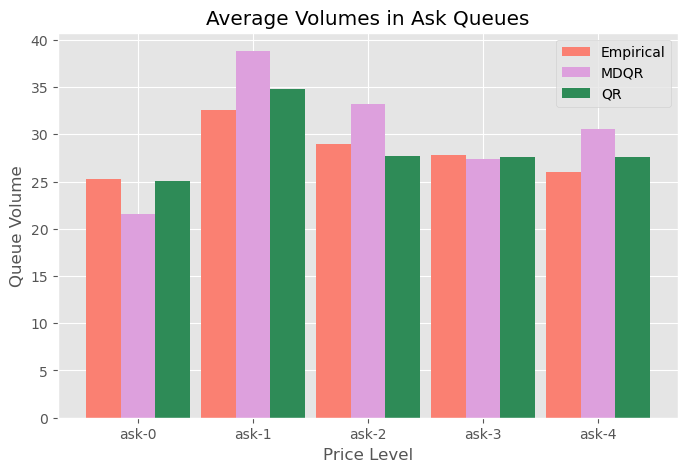

In [3432]:
plot_avg_queue_size(emp_df,mdqr_test_df,qr_df)

In [3274]:
#function to plot corr matrices on page 23
#input initial simulation and then simulation generated from MDQR intensities

def plot_side_by_side_correlation(emp_df, mdqr_df):
    queue_columns = [col for col in emp_df.columns if '_size' in col]

    emp_corr = emp_df[queue_columns].corr()
    mdqr_corr = mdqr_df[queue_columns].corr()

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.heatmap(emp_corr, annot=True, cmap="YlGnBu", center=0, fmt=".2f", linewidths=0.5, ax=axes[0])
    axes[0].set_title("Empirical", fontsize=14)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)

    sns.heatmap(mdqr_corr, annot=True, cmap="YlGnBu", center=0, fmt=".2f", linewidths=0.5, ax=axes[1])
    axes[1].set_title("MDQR", fontsize=14)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

    plt.tight_layout()
    plt.show()

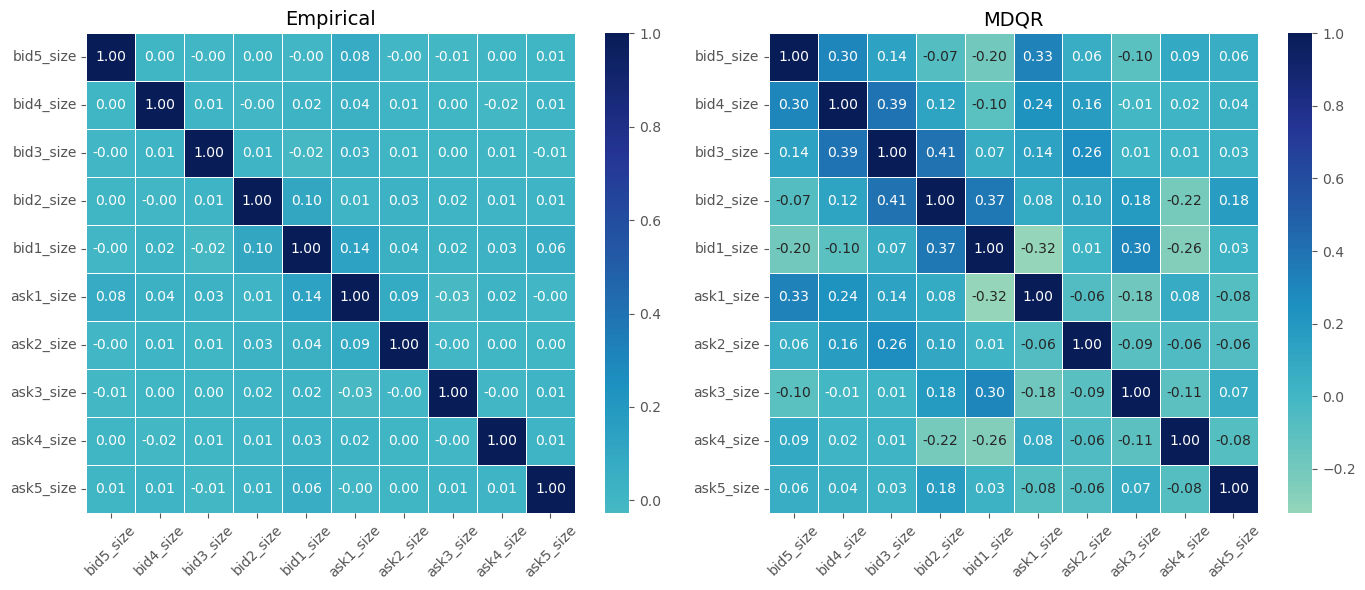

In [3276]:
plot_side_by_side_correlation(emp_df,mdqr_test_df)

In [3674]:
#function to plot boxplots for frequency of event on page 24
#input initial simulation and then simulation generated from MDQR intensities

def plot_event_count_boxplots(emp_df, qr_df, mdqr_df):
    emp_df_copy, qr_df_copy, mdqr_df_copy = emp_df.copy(), qr_df.copy(), mdqr_df.copy()
    for df in [emp_df_copy, qr_df_copy, mdqr_df_copy]:
        df['Time'] = pd.to_datetime(df['Time'], unit='s')
        df.set_index('Time', inplace=True)

    emp_event_counts = emp_df_copy.resample('60s')['Event'].value_counts().unstack(fill_value=0)
    qr_event_counts = qr_df_copy.resample('60s')['Event'].value_counts().unstack(fill_value=0)
    mdqr_event_counts = mdqr_df_copy.resample('60s')['Event'].value_counts().unstack(fill_value=0)

    emp_event_counts = emp_event_counts.reindex(columns=['limit', 'cancel', 'market'], fill_value=0)
    qr_event_counts = qr_event_counts.reindex(columns=['limit', 'cancel', 'market'], fill_value=0)
    mdqr_event_counts = mdqr_event_counts.reindex(columns=['limit', 'cancel', 'market'], fill_value=0)

    fig, axes = plt.subplots(1, 3, figsize=(15, 6))

    event_types = ['limit', 'cancel', 'market']
    colors = ['red', 'blue', 'green']

    for i, event in enumerate(event_types):
        combined_df = pd.DataFrame({
            'Count': list(emp_event_counts[event]) + list(qr_event_counts[event])+list(mdqr_event_counts[event]),
            'Model': ['Empirical'] * len(emp_event_counts) + ['QR']*len(qr_event_counts) +['MDQR'] * len(mdqr_event_counts)
        })
        sns.boxplot(x='Model', y='Count', hue='Model', data=combined_df, ax=axes[i], palette={'Empirical': 'salmon', 'QR' : 'seagreen','MDQR': 'skyblue'}, showfliers=False, dodge=False, legend=False)

        axes[i].set_title(f"{event.capitalize()} Events", fontsize=14)
        axes[i].set_ylabel("Event Count")
        axes[i].grid(True, linestyle="--", alpha=0.5)

    plt.tight_layout()
    plt.show()


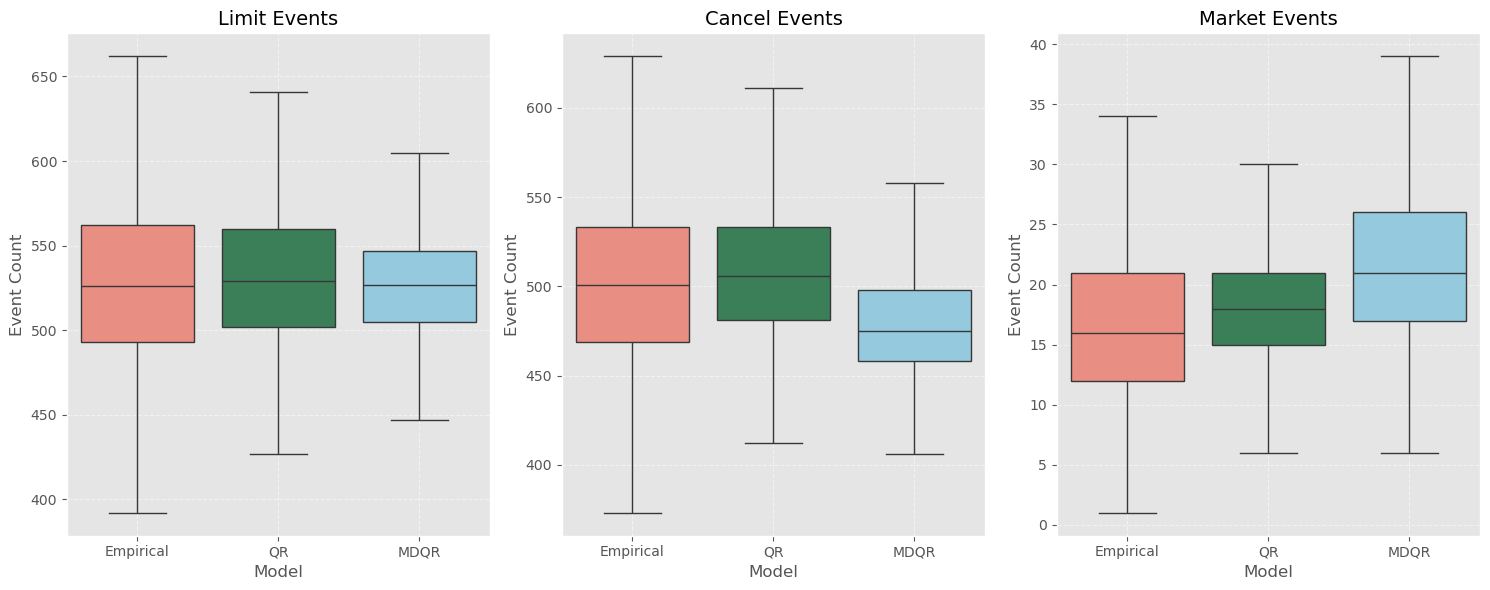

In [3676]:
plot_event_count_boxplots(emp_df, qr_df, mdqr_test_df)

In [3607]:
#function to get empirical transition matrix for mdqr results
#input simulation dataframe
def get_emp_mdqr_trans_matrix(df):
    cond1 = df["Queue"] == 1
    cond2 = df["Queue"] == -1
    df["event_type"] = np.select(
        [
            (cond1 & (df["Event"] == "limit")),
            (cond1 & (df["Event"] == "cancel")),
            (cond1 & (df["Event"] == "market")),
            (cond2 & (df["Event"] == "limit")),
            (cond2 & (df["Event"] == "cancel")),
            (cond2 & (df["Event"] == "market")),
        ],
        [0, 1, 2, 3, 4, 5],
        default=-1
    )
    df['prev_event_type'] = df['event_type'].shift(1).fillna(0).astype(int)

    c_04 = len(df[(df['event_type']==0) & (df['prev_event_type']==4)])
    c_14 = len(df[(df['event_type']==1) & (df['prev_event_type']==4)])
    c_24 = len(df[(df['event_type']==2) & (df['prev_event_type']==4)])
    c_34 = len(df[(df['event_type']==3) & (df['prev_event_type']==4)])
    c_44 = len(df[(df['event_type']==4) & (df['prev_event_type']==4)])
    c_54 = len(df[(df['event_type']==5) & (df['prev_event_type']==4)])

    c_01 = len(df[(df['event_type']==0) & (df['prev_event_type']==1)])
    c_11 = len(df[(df['event_type']==1) & (df['prev_event_type']==1)])
    c_21 = len(df[(df['event_type']==2) & (df['prev_event_type']==1)])
    c_31 = len(df[(df['event_type']==3) & (df['prev_event_type']==1)])
    c_41 = len(df[(df['event_type']==4) & (df['prev_event_type']==1)])
    c_51 = len(df[(df['event_type']==5) & (df['prev_event_type']==1)])

    c_03 = len(df[(df['event_type']==0) & (df['prev_event_type']==3)])
    c_13 = len(df[(df['event_type']==1) & (df['prev_event_type']==3)])
    c_23 = len(df[(df['event_type']==2) & (df['prev_event_type']==3)])
    c_33 = len(df[(df['event_type']==3) & (df['prev_event_type']==3)])
    c_43 = len(df[(df['event_type']==4) & (df['prev_event_type']==3)])
    c_53 = len(df[(df['event_type']==5) & (df['prev_event_type']==3)])

    c_00 = len(df[(df['event_type']==0) & (df['prev_event_type']==0)])
    c_10 = len(df[(df['event_type']==1) & (df['prev_event_type']==0)])
    c_20 = len(df[(df['event_type']==2) & (df['prev_event_type']==0)])
    c_30 = len(df[(df['event_type']==3) & (df['prev_event_type']==0)])
    c_40 = len(df[(df['event_type']==4) & (df['prev_event_type']==0)])
    c_50 = len(df[(df['event_type']==5) & (df['prev_event_type']==0)])

    c_05 = len(df[(df['event_type']==0) & (df['prev_event_type']==5)])
    c_15 = len(df[(df['event_type']==1) & (df['prev_event_type']==5)])
    c_25 = len(df[(df['event_type']==2) & (df['prev_event_type']==5)])
    c_35 = len(df[(df['event_type']==3) & (df['prev_event_type']==5)])
    c_45 = len(df[(df['event_type']==4) & (df['prev_event_type']==5)])
    c_55 = len(df[(df['event_type']==5) & (df['prev_event_type']==5)])

    c_02 = len(df[(df['event_type']==0) & (df['prev_event_type']==2)])
    c_12 = len(df[(df['event_type']==1) & (df['prev_event_type']==2)])
    c_22 = len(df[(df['event_type']==2) & (df['prev_event_type']==2)])
    c_32 = len(df[(df['event_type']==3) & (df['prev_event_type']==2)])
    c_42 = len(df[(df['event_type']==4) & (df['prev_event_type']==2)])
    c_52 = len(df[(df['event_type']==5) & (df['prev_event_type']==2)])

    row0 = np.array([c_44,c_14,c_34,c_04,c_54,c_24])/(c_04+c_14+c_24+c_34+c_44+c_54)
    row1 = np.array([c_41,c_11,c_31,c_01,c_51,c_21])/(c_01+c_11+c_21+c_31+c_41+c_51)
    row2 = np.array([c_43,c_13,c_33,c_03,c_53,c_23])/(c_03+c_13+c_23+c_33+c_43+c_53)
    row3 = np.array([c_40,c_10,c_30,c_00,c_50,c_20])/(c_00+c_10+c_20+c_30+c_40+c_50)
    row4 = np.array([c_45,c_15,c_35,c_05,c_55,c_25])/(c_05+c_15+c_25+c_35+c_45+c_55)
    row5 = np.array([c_42,c_12,c_32,c_02,c_52,c_22])/(c_05+c_15+c_25+c_35+c_45+c_55)
    mdqr_trans_matrix = np.vstack((row0,row1,row2,row3,row4,row5))
    return mdqr_trans_matrix

In [3609]:
#function to plot transition matrices
#imput initial simulation and then simulation generated from MDQR intensities
def plot_MDQR_transitions(emp_df, MDQR_sim_df):
    emp_trans_matrix = get_emp_mdqr_trans_matrix(emp_df)
    MDQR_trans_matrix = get_emp_mdqr_trans_matrix(MDQR_sim_df)

    matrices = [emp_trans_matrix, MDQR_trans_matrix]
    titles = [ "Empirical", "MDQR"]
    event_labels =  [" cancel_ask"," cancel_bid"," limit_ask","limit_bid","trade_ask","trade_bid"]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for ax, matrix,title in zip(axes,matrices,titles):
        sns.heatmap(matrix,annot = True, fmt=".2f", cmap="viridis", cbar=True,
                    xticklabels=event_labels, yticklabels=event_labels, ax=ax)
        ax.set_title(title)
        ax.set_xlabel("Next Event Type")
        ax.set_ylabel("Previous Event Type")
    plt.tight_layout()
    plt.show()

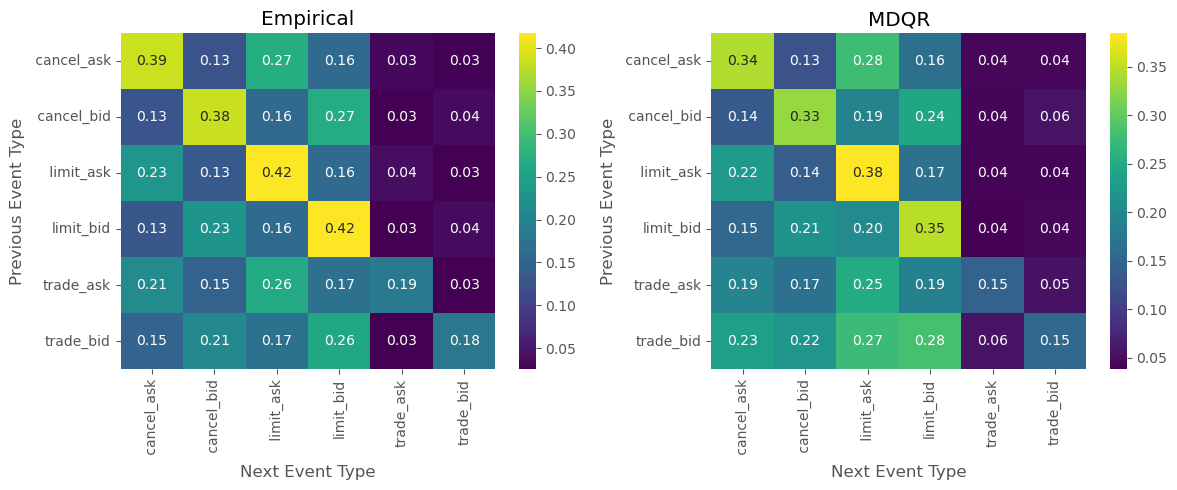

In [3611]:
plot_MDQR_transitions(emp_df, mdqr_test_df)

In [3416]:
mdqr_test_df['Price'] = 100

In [3418]:
mdqr_single_queue = mdqr_test_df[mdqr_test_df.Queue == 1]
df = normalise_queues(mdqr_single_queue)
df = reset_inter_event_times(df)
df = excitation_get_features(df)

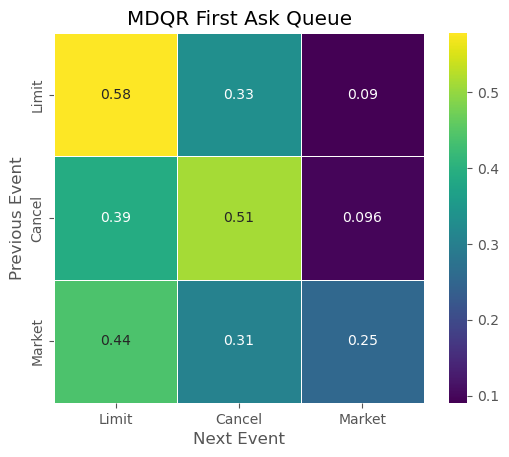

In [3420]:
labels = ['Limit','Cancel','Market']
sns.heatmap(get_empirical_transition_matrix(df), cmap = 'viridis',annot=True, cbar=True, square=True, linewidths=0.5,xticklabels = labels,yticklabels = labels)
plt.title("MDQR First Ask Queue")
plt.xlabel("Next Event")
plt.xticks()
plt.ylabel("Previous Event")
plt.show()